<a href="https://colab.research.google.com/github/Skevrek/MBA_Thesis/blob/main/SVRSemis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import plotly.express as px
import statistics
from scipy import stats
from sklearn.metrics import r2_score
from google.colab import data_table
from sklearn.model_selection import GridSearchCV
data_table.enable_dataframe_formatter()

In [2]:
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-1M.xlsx")

In [3]:
df.head(5)

,Date,PPI,PPI_Lagged,GPR,Export_Semis,Import_Semis,Employees_Semis,Export_NoSemis,Import_NoSemis,RIW_Semis,Export_CapitalGoods,IP_NoEnergy
0,1994-01-01,4.656813,4.656813,4.376408,4.952300,5.087596,6.256134,5.144583,4.676560,1.047985,4.570579,4.560595
1,1994-02-01,4.657763,4.656813,4.424727,4.950177,5.083886,6.258242,5.130490,4.678421,1.072884,4.572647,4.558226
2,1994-03-01,4.657763,4.657763,4.764241,4.957938,5.075799,6.260537,5.121580,4.677491,1.084209,4.572647,4.557494
3,1994-04-01,4.658711,4.657763,4.537684,4.955827,5.085743,6.264731,5.117994,4.682131,1.110640,4.572647,4.570966
4,1994-05-01,4.657763,4.658711,4.557627,4.938065,5.084505,6.269854,5.114995,4.683981,1.147783,4.571613,4.575610


In [4]:
df.columns

Index(['Date', 'PPI', 'PPI_Lagged', 'GPR', 'Export_Semis', 'Import_Semis',
       'Employees_Semis', 'Export_NoSemis', 'Import_NoSemis', 'RIW_Semis',
       'Export_CapitalGoods', 'IP_NoEnergy'],
      dtype='object')

In [5]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PPI,PPI_Lagged,GPR,Export_Semis,Import_Semis,Employees_Semis,Export_NoSemis,Import_NoSemis,RIW_Semis,Export_CapitalGoods,IP_NoEnergy
PPI,1.000000,0.999742,-0.137066,0.956445,0.974686,0.914955,0.989952,-0.666341,0.935677,-0.952929,0.423283
PPI_Lagged,0.999742,1.000000,-0.138073,0.955451,0.974755,0.914653,0.989945,-0.667940,0.936424,-0.954086,0.425774
GPR,-0.137066,-0.138073,1.000000,-0.233179,-0.151246,-0.267961,-0.160405,-0.100299,-0.263955,0.093402,-0.036960
Export_Semis,0.956445,0.955451,-0.233179,1.000000,0.960498,0.894374,0.964740,-0.472211,0.880437,-0.843477,0.248912
Import_Semis,0.974686,0.974755,-0.151246,0.960498,1.000000,0.838682,0.990079,-0.521573,0.886671,-0.903565,0.309779
Employees_Semis,0.914955,0.914653,-0.267961,0.894374,0.838682,1.000000,0.879575,-0.674461,0.911596,-0.863268,0.533284
Export_NoSemis,0.989952,0.989945,-0.160405,0.964740,0.990079,0.879575,1.000000,-0.588299,0.916665,-0.936188,0.381172
Import_NoSemis,-0.666341,-0.667940,-0.100299,-0.472211,-0.521573,-0.674461,-0.588299,1.000000,-0.697869,0.806786,-0.670992
RIW_Semis,0.935677,0.936424,-0.263955,0.880437,0.886671,0.911596,0.916665,-0.697869,1.000000,-0.934502,0.502629
Export_CapitalGoods,-0.952929,-0.954086,0.093402,-0.843477,-0.903565,-0.863268,-0.936188,0.806786,-0.934502,1.000000,-0.553137


<ipython-input-6-4d6f96c67db9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidth=.5)


<Axes: >

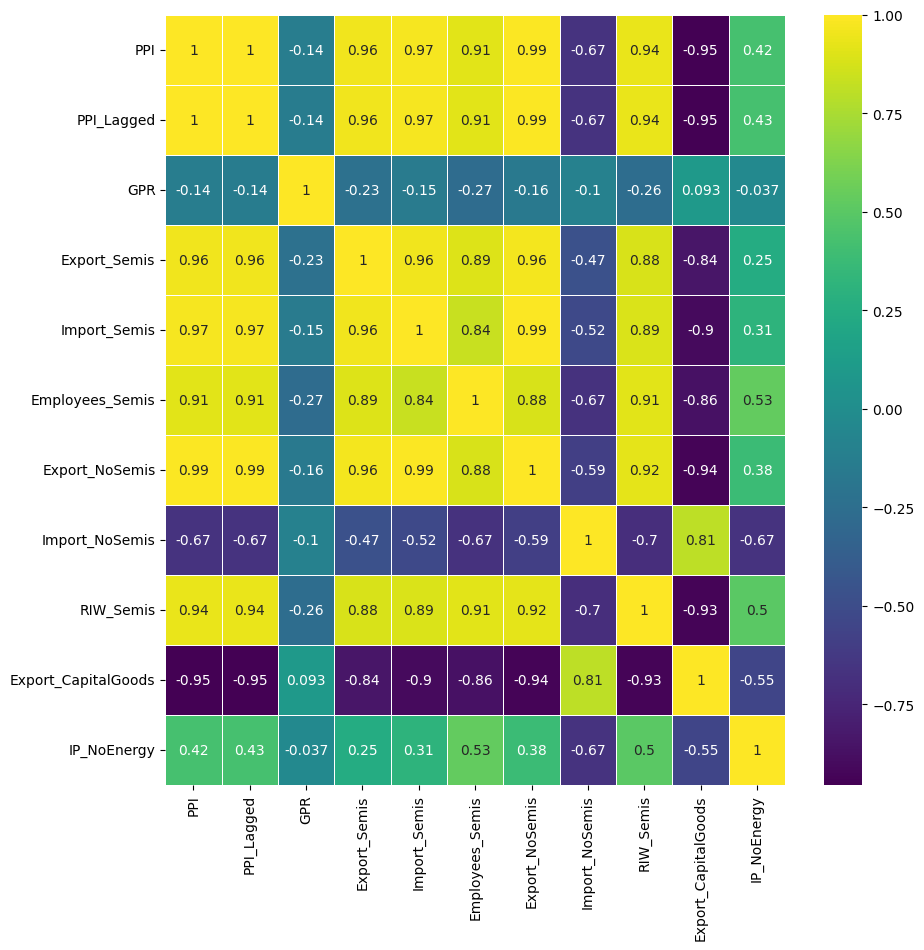

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidth=.5)

<ipython-input-7-af785ddfd842>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['PPI'].drop('PPI').sort_values().plot(kind='bar')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Export_CapitalGoods'),
  Text(1, 0, 'Import_NoSemis'),
  Text(2, 0, 'GPR'),
  Text(3, 0, 'IP_NoEnergy'),
  Text(4, 0, 'Employees_Semis'),
  Text(5, 0, 'RIW_Semis'),
  Text(6, 0, 'Export_Semis'),
  Text(7, 0, 'Import_Semis'),
  Text(8, 0, 'Export_NoSemis'),
  Text(9, 0, 'PPI_Lagged')])

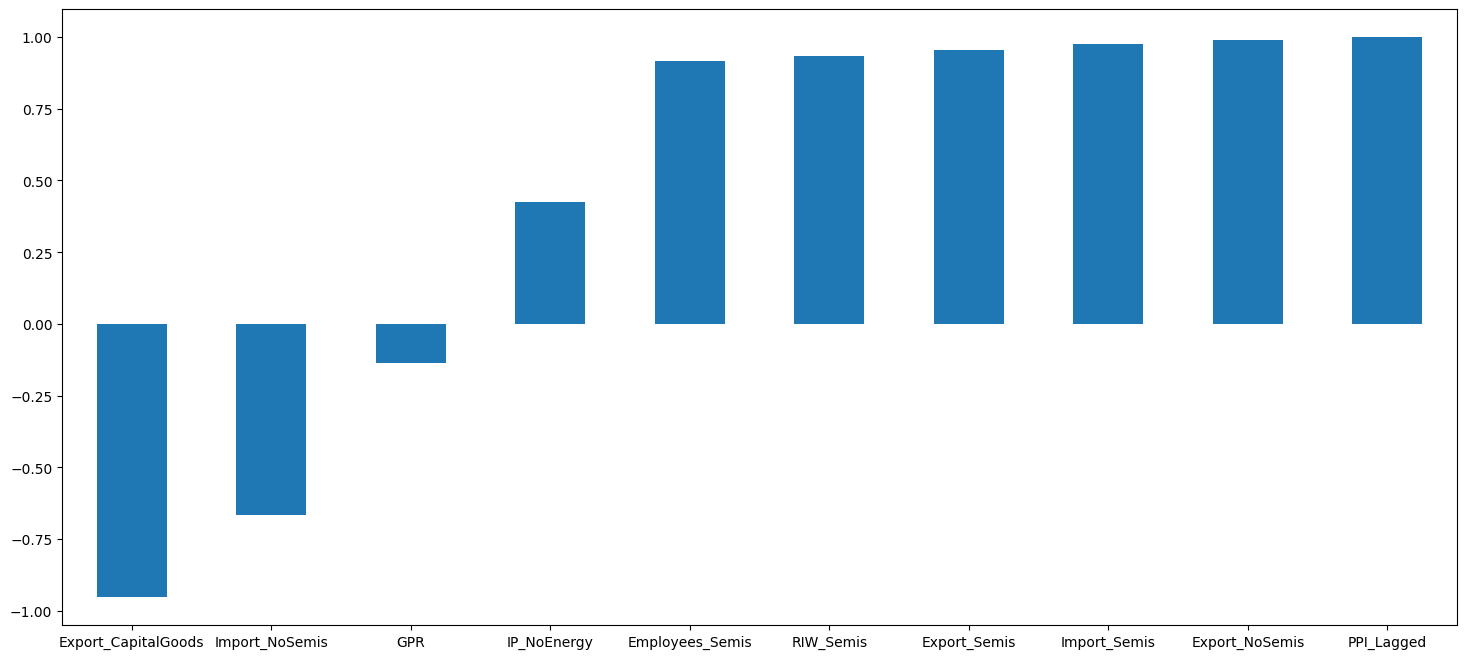

In [7]:
plt.figure(figsize=(18,8))
df.corr()['PPI'].drop('PPI').sort_values().plot(kind='bar')
plt.xticks(rotation='horizontal')

In [8]:
cdf_1M = df[['PPI', 'PPI_Lagged',  'Export_Semis', 'Import_Semis','Employees_Semis',   'RIW_Semis','Export_CapitalGoods']]
cdf_1M.head(5)

,PPI,PPI_Lagged,Export_Semis,Import_Semis,Employees_Semis,RIW_Semis,Export_CapitalGoods
0,4.656813,4.656813,4.952300,5.087596,6.256134,1.047985,4.570579
1,4.657763,4.656813,4.950177,5.083886,6.258242,1.072884,4.572647
2,4.657763,4.657763,4.957938,5.075799,6.260537,1.084209,4.572647
3,4.658711,4.657763,4.955827,5.085743,6.264731,1.110640,4.572647
4,4.657763,4.658711,4.938065,5.084505,6.269854,1.147783,4.571613


In [9]:
X = cdf_1M.drop('PPI', axis=1) # Features
y = cdf_1M['PPI'] # Target variable

split_idx = int(len(cdf_1M)*0.7) # index to split at last entry
X_train = cdf_1M.iloc[:split_idx, 1:] # train features
y_train = cdf_1M.iloc[:split_idx, 0] # train target
X_test = cdf_1M.iloc[split_idx:, 1:] # test features
y_test = cdf_1M.iloc[split_idx:, 0] # test target

# Defining Parameters

C_arr = [0.1,1.0,10,100,1000]
eps_arr = [0.1,0.01,0.001,0.0001,0.00001]

# Hyper tuning SVR Model

hyper_arr = []
hyper_cols =  ['c','epsilon','correlation']
for C in C_arr:
    for epsilon in eps_arr:
        model = SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        corr = stats.pearsonr(y_test,y_pred)[0]
        hyper_arr.append([C,epsilon,corr])

hyper_df = pd.DataFrame(hyper_arr,columns= hyper_cols)
hyper_df = hyper_df.sort_values(by=['correlation'], ascending=False)
hyper_df

,c,epsilon,correlation
17,100.0,0.00100,0.985157
18,100.0,0.00010,0.983088
19,100.0,0.00001,0.982596
24,1000.0,0.00001,0.979907
23,1000.0,0.00010,0.979638
22,1000.0,0.00100,0.977154
12,10.0,0.00100,0.974002
14,10.0,0.00001,0.972428
13,10.0,0.00010,0.971609
11,10.0,0.01000,0.961819


In [10]:
len(X_test)

105

In [11]:
# Building SVR model with best parameters
model_svr = SVR(kernel='rbf', C=100, epsilon=0.001) # set kernel and hyperparameters
svr = model_svr.fit(X_train, y_train)
result_df = pd.DataFrame([],columns=[])
result_df['svr_predicted'] = model_svr.predict(X_test) # SVR
result_df['true'] = y_test.values
result_df['svr_error'] = abs(result_df['true'] - result_df['svr_predicted'])
result_df

,svr_predicted,true,svr_error
0,4.072247,4.072440,0.000192
1,4.072101,4.072440,0.000339
2,4.072240,4.074142,0.001902
3,4.073323,4.072440,0.000883
4,4.071973,4.074142,0.002169
...,...,...,...
100,4.038551,4.039924,0.001372
101,4.042312,4.048527,0.006215
102,4.050528,4.052446,0.001918
103,4.054259,4.053141,0.001118


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_svr = model_svr.predict(X_test)
mae = mean_absolute_error(result_df['true'], result_df['svr_predicted'])
mse = mean_squared_error(result_df['true'], result_df['svr_predicted'])
r2 = r2_score(result_df['true'], result_df['svr_predicted'])

# print the scores
print("SVR Correlation : ", stats.pearsonr(y_test,y_svr)[0])
print("SVR MAE:", mae)
print("SVR MSE:", "{:.6f}".format(mse))
print("SVR R2 score:", r2)

#CODE FOR CROSS VALIDATION
# from sklearn.model_selection import cross_val_predict

# # perform 5-fold cross-validation and compute scores
# y_pred_cv = cross_val_predict(model_svr, X_train, y_train, cv=5)
# mae_cv = mean_absolute_error(y_train, y_pred_cv)
# mse_cv = mean_squared_error(y_train, y_pred_cv)
# r2_cv = r2_score(y_train, y_pred_cv)

# # print the scores
# print("\nCross-validated MAE:", mae_cv)
# print("Cross-validated MSE:", mse_cv)
# print("Cross-validated R2 score:", r2_cv)

SVR Correlation :  0.985157494208709
SVR MAE: 0.002936541769339366
SVR MSE: 0.000018
SVR R2 score: 0.9704406904748392


In [13]:
train_y_pred = model_svr.predict(X_train)
train_mape = np.mean(np.abs((y_train - train_y_pred) / y_train)) * 100
print("Train MAPE: {:.8f}%".format(train_mape))

# test_mape = np.mean(np.abs((result_df['true'] - result_df['svr_predicted']) / result_df['true'])) * 100
test_mape = np.mean(np.abs((y_test-y_svr) / y_test)) * 100
print("Test MAPE: {:.8f}%".format(test_mape))

Train MAPE: 0.07511133%
Test MAPE: 0.07291189%


In [14]:
train_actual = y_train.reset_index(drop=True)
train_pred = pd.DataFrame(model_svr.predict(X_train), columns=['PPI_pred'])

# Create dataframes for actual and predicted values of test set
test_actual = y_test.reset_index(drop=True)
test_pred = pd.DataFrame(y_svr, columns=['PPI_pred'])

# Concatenate actual and predicted values for train and test sets
train_df = pd.concat([train_actual, train_pred], axis=1)
test_df = pd.concat([test_actual, test_pred], axis=1)

# Calculate MAPE for train and test sets separately
train_df['MAPE'] = np.abs(train_df['PPI'] - train_df['PPI_pred']) / train_df['PPI']
test_df['MAPE'] = np.abs(test_df['PPI'] - test_df['PPI_pred']) / test_df['PPI']

# Print train and test MAPE results
print("Train MAPE: {:.8%}".format(train_df['MAPE'].mean()))
print("Test MAPE: {:.8%}".format(test_df['MAPE'].mean()))

Train MAPE: 0.07511133%
Test MAPE: 0.07291189%


In [15]:
test_df

,PPI,PPI_pred,MAPE
0,4.072440,4.072247,0.000047
1,4.072440,4.072101,0.000083
2,4.074142,4.072240,0.000467
3,4.072440,4.073323,0.000217
4,4.074142,4.071973,0.000532
...,...,...,...
100,4.039924,4.038551,0.000340
101,4.048527,4.042312,0.001535
102,4.052446,4.050528,0.000473
103,4.053141,4.054259,0.000276


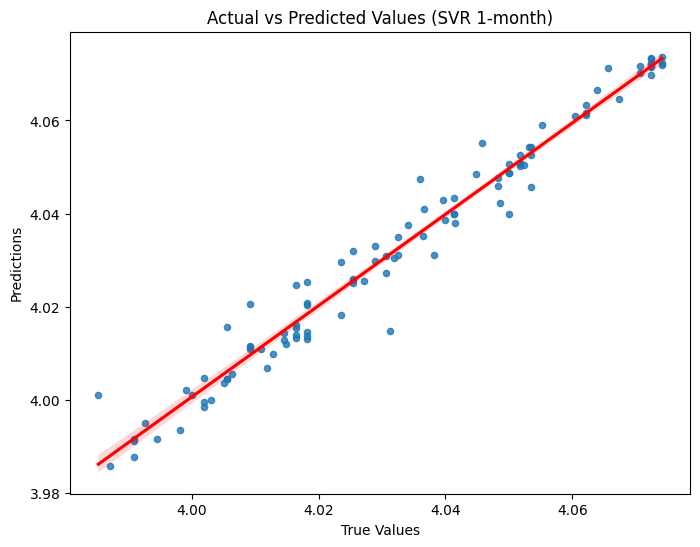

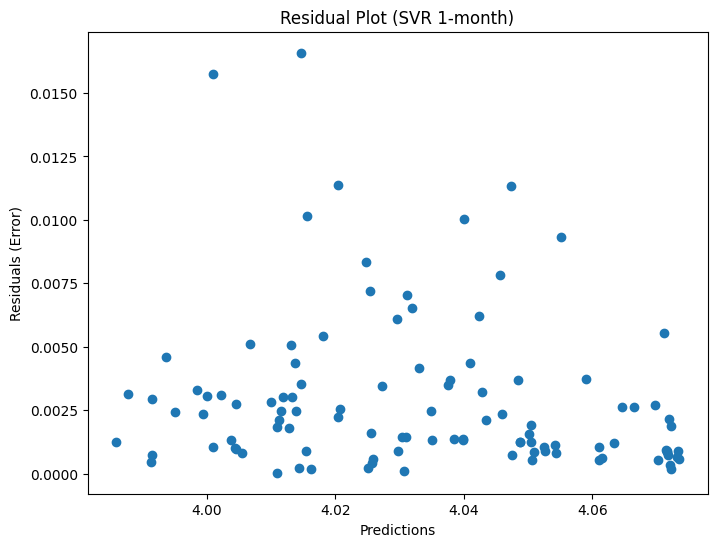

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=y_test, y=result_df['svr_predicted'], scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (SVR 1-month)")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
# plot the residual plot
plt.scatter(result_df['svr_predicted'], result_df['svr_error'])
plt.xlabel("Predictions")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot (SVR 1-month)")
plt.show()

**Forecast for 1 month**

In [17]:
# CODE IS RUNNING NEED TO UPDATE THE FEATURES IN THE CDF TABLE BASED ON THE INPUTS AT THE MODELING

# # define the predictor variables for the forecast
# X = cdf_1M[['PPI_Lagged']]

# # predict the target variable for the next month
# y_pred = model_svr.predict(X.iloc[[-1]])

# # create a new DataFrame for the predicted values
# forecast_df = pd.DataFrame(data=y_pred, columns=['PPI'])

# # set the index to the next month
# forecast_df = pd.DataFrame({'Forecasted PPI': y_pred}, index=[pd.date_range(start=cdf_1M.index[-1], periods=2, freq='MS')[1]])

# # plot the actual and forecasted values
# plt.plot(range(len(cdf_1M)), cdf_1M['PPI'], label='Historical PPI')
# plt.plot(range(len(cdf_1M),len(cdf_1M)+1), forecast_df['Forecasted PPI'], label='Forecasted PPI')
# plt.xlabel('Time (months)')
# plt.ylabel('PPI')
# plt.title('SVR Historical and Forecasted PPI')
# plt.legend()
# plt.show()
# print("Forecasted PPI for the next month:", y_pred[0])

**Forecast** for 3 months

In [18]:
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-3M.xlsx")

In [19]:
df.columns

Index(['Date', 'PPI', 'PPI_Lagged', 'GPR', 'Export_Semis', 'Import_Semis',
       'Employees_Semis', 'Export_NoSemis', 'Import_NoSemis', 'RIW_Semis',
       'Export_CapitalGoods', 'IP_NoEnergy'],
      dtype='object')

In [20]:
cdf_3M = df[['PPI', 'PPI_Lagged','GPR', 'Export_Semis', 'Import_Semis','Employees_Semis']]
cdf_3M.head(5)

,PPI,PPI_Lagged,GPR,Export_Semis,Import_Semis,Employees_Semis
0,4.657763,4.656813,4.376408,4.952300,5.087596,6.256134
1,4.658711,4.656813,4.424727,4.950177,5.083886,6.258242
2,4.657763,4.657763,4.764241,4.957938,5.075799,6.260537
3,4.658711,4.657763,4.537684,4.955827,5.085743,6.264731
4,4.657763,4.658711,4.557627,4.938065,5.084505,6.269854


In [21]:
X = cdf_3M.drop('PPI', axis=1) # Features
y = cdf_3M['PPI'] # Target variable

split_idx = int(len(cdf_3M)*0.7) # index to split at last entry
X_train = cdf_3M.iloc[:split_idx, 1:] # train features
y_train = cdf_3M.iloc[:split_idx, 0] # train target
X_test = cdf_3M.iloc[split_idx:, 1:] # test features
y_test = cdf_3M.iloc[split_idx:, 0] # test target

# Defining Parameters

C_arr = [0.1,1.0,10,100,1000]
eps_arr = [0.1,0.01,0.001,0.0001,0.00001]

# Hyper tuning SVR Model

hyper_arr = []
hyper_cols =  ['c','epsilon','correlation']
for C in C_arr:
    for epsilon in eps_arr:
        model = SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        corr = stats.pearsonr(y_test,y_pred)[0]
        hyper_arr.append([C,epsilon,corr])

hyper_df = pd.DataFrame(hyper_arr,columns= hyper_cols)
hyper_df = hyper_df.sort_values(by=['correlation'], ascending=False)
hyper_df


,c,epsilon,correlation
19,100.0,0.00001,0.938961
18,100.0,0.00010,0.938238
17,100.0,0.00100,0.932344
21,1000.0,0.01000,0.879710
22,1000.0,0.00100,0.859138
23,1000.0,0.00010,0.839341
24,1000.0,0.00001,0.835824
13,10.0,0.00010,0.759583
14,10.0,0.00001,0.756466
12,10.0,0.00100,0.750871


In [22]:
# Building SVR model with best parameters
model_svr = SVR(kernel='rbf', C=hyper_df.c.iloc[0], epsilon=hyper_df.epsilon.iloc[0]) # set kernel and hyperparameters
svr = model_svr.fit(X_train, y_train)
result_df = pd.DataFrame([],columns=[])
result_df['svr_predicted'] = model_svr.predict(X_test) # SVR
result_df['true'] = y_test.values
result_df['svr_error'] = abs(result_df['true'] - result_df['svr_predicted'])
result_df

,svr_predicted,true,svr_error
0,4.063796,4.072440,0.008644
1,4.075396,4.072440,0.002956
2,4.070675,4.074142,0.003466
3,4.069275,4.072440,0.003164
4,4.072428,4.074142,0.001713
...,...,...,...
100,4.045423,4.039924,0.005500
101,4.041849,4.048527,0.006679
102,4.042039,4.052446,0.010406
103,4.045125,4.053141,0.008015


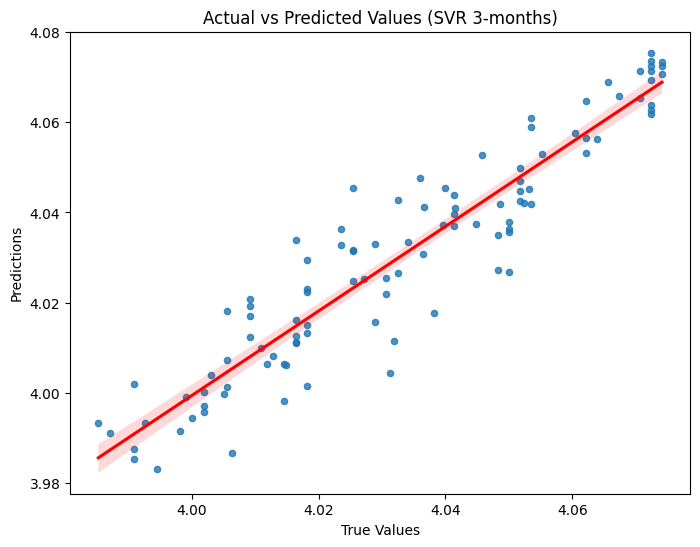

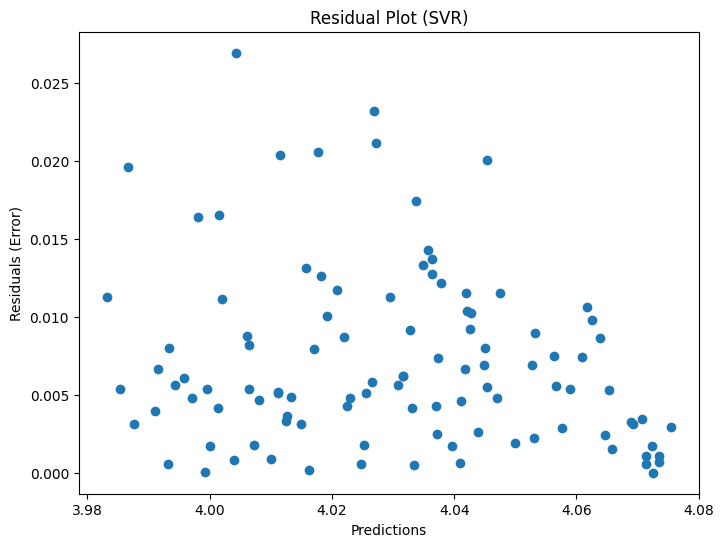

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=y_test, y=result_df['svr_predicted'], scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (SVR 3-months)")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
# plot the residual plot
plt.scatter(result_df['svr_predicted'], result_df['svr_error'])
plt.xlabel("Predictions")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot (SVR)")
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_svr = model_svr.predict(X_test)
mae = mean_absolute_error(result_df['true'], result_df['svr_predicted'])
mse = mean_squared_error(result_df['true'], result_df['svr_predicted'])
r2 = r2_score(result_df['true'], result_df['svr_predicted'])

#print the parameters
print("C:", model_svr.C)
print("Epsilon:", model_svr.epsilon)

# print the scores
print("SVR Correlation : ", stats.pearsonr(y_test,y_svr)[0])
print("SVR MAE:", mae)
print("SVR MSE:", "{:.6f}".format(mse))
print("SVR R2 score:", r2)

# from sklearn.model_selection import cross_val_predict

# # perform 5-fold cross-validation and compute scores
# y_pred_cv = cross_val_predict(model_svr, X_train, y_train, cv=5)
# mae_cv = mean_absolute_error(y_train, y_pred_cv)
# mse_cv = mean_squared_error(y_train, y_pred_cv)
# r2_cv = r2_score(y_train, y_pred_cv)

# # print the scores
# print("\nCross-validated MAE:", mae_cv)
# print("Cross-validated MSE:", mse_cv)
# print("Cross-validated R2 score:", r2_cv)

C: 100.0
Epsilon: 1e-05
SVR Correlation :  0.9389608802739453
SVR MAE: 0.00711996885597117
SVR MSE: 0.000083
SVR R2 score: 0.8667001499370012


In [25]:
train_y_pred = model_svr.predict(X_train)
train_mape = np.mean(np.abs((y_train - train_y_pred) / y_train)) * 100
print("Train MAPE: {:.8f}%".format(train_mape))

# test_mape = np.mean(np.abs((result_df['true'] - result_df['svr_predicted']) / result_df['true'])) * 100
test_mape = np.mean(np.abs((y_test-y_svr) / y_test)) * 100
print("Test MAPE: {:.8f}%".format(test_mape))

Train MAPE: 0.11541072%
Test MAPE: 0.17660063%


In [26]:
train_actual = y_train.reset_index(drop=True)
train_pred = pd.DataFrame(model_svr.predict(X_train), columns=['PPI_pred'])

# Create dataframes for actual and predicted values of test set
test_actual = y_test.reset_index(drop=True)
test_pred = pd.DataFrame(y_svr, columns=['PPI_pred'])

# Concatenate actual and predicted values for train and test sets
train_df = pd.concat([train_actual, train_pred], axis=1)
test_df = pd.concat([test_actual, test_pred], axis=1)

# Calculate MAPE for train and test sets separately
train_df['MAPE'] = np.abs(train_df['PPI'] - train_df['PPI_pred']) / train_df['PPI']
test_df['MAPE'] = np.abs(test_df['PPI'] - test_df['PPI_pred']) / test_df['PPI']

# Print train and test MAPE results
print("Train MAPE: {:.8%}".format(train_df['MAPE'].mean()))
print("Test MAPE: {:.8%}".format(test_df['MAPE'].mean()))

Train MAPE: 0.11541072%
Test MAPE: 0.17660063%


In [27]:
test_df

,PPI,PPI_pred,MAPE
0,4.072440,4.063796,0.002123
1,4.072440,4.075396,0.000726
2,4.074142,4.070675,0.000851
3,4.072440,4.069275,0.000777
4,4.074142,4.072428,0.000421
...,...,...,...
100,4.039924,4.045423,0.001361
101,4.048527,4.041849,0.001650
102,4.052446,4.042039,0.002568
103,4.053141,4.045125,0.001978


In [28]:
# CODE IS RUNNING NEED TO UPDATE THE FEATURES IN THE CDF TABLE BASED ON THE INPUTS AT THE MODELING

# # define the predictor variables for the forecast
# X = cdf_3M[[ 'PPI_Lagged', 'GPR', 'Export_Semis', 'Import_Semis',
#        'Employees_Semis', 'Export_NoSemis',  'RIW_Semis','Export_CapitalGoods']].tail(3)

# # predict the target variable for the next 3 months
# y_pred = model_svr.predict(X)

# # create a new DataFrame for the predicted values
# forecast_df = pd.DataFrame(data=y_pred, columns=['PPI'])

# # set the index to the next 3 months
# forecast_index = pd.date_range(start=cdf_3M.index[-1], periods=3, freq='MS')
# forecast_df.set_index(forecast_index, inplace=True)

# # plot the actual and forecasted values
# plt.plot(range(len(cdf_3M)), cdf_3M['PPI'], label='Historical PPI')
# plt.plot(range(len(cdf_3M),len(cdf_3M)+3), forecast_df['PPI'], label='PPI')
# plt.xlabel('Time (months)')
# plt.ylabel('PPI')
# plt.title('SVR Historical and Forecasted PPI')
# plt.legend()
# plt.show()

# print("Forecasted PPI for the next 3 months:")
# print(forecast_df.values)

**TESTING DIFFERENT VARIABLES**


In [29]:
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-6M.xlsx")

In [30]:
df.columns

Index(['Date', 'PPI', 'PPI_Lagged', 'GPR', 'Export_Semis', 'Import_Semis',
       'Employees_Semis', 'Export_NoSemis', 'Import_NoSemis', 'RIW_Semis',
       'Export_CapitalGoods', 'IP_NoEnergy'],
      dtype='object')

<ipython-input-31-4d6f96c67db9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidth=.5)


<Axes: >

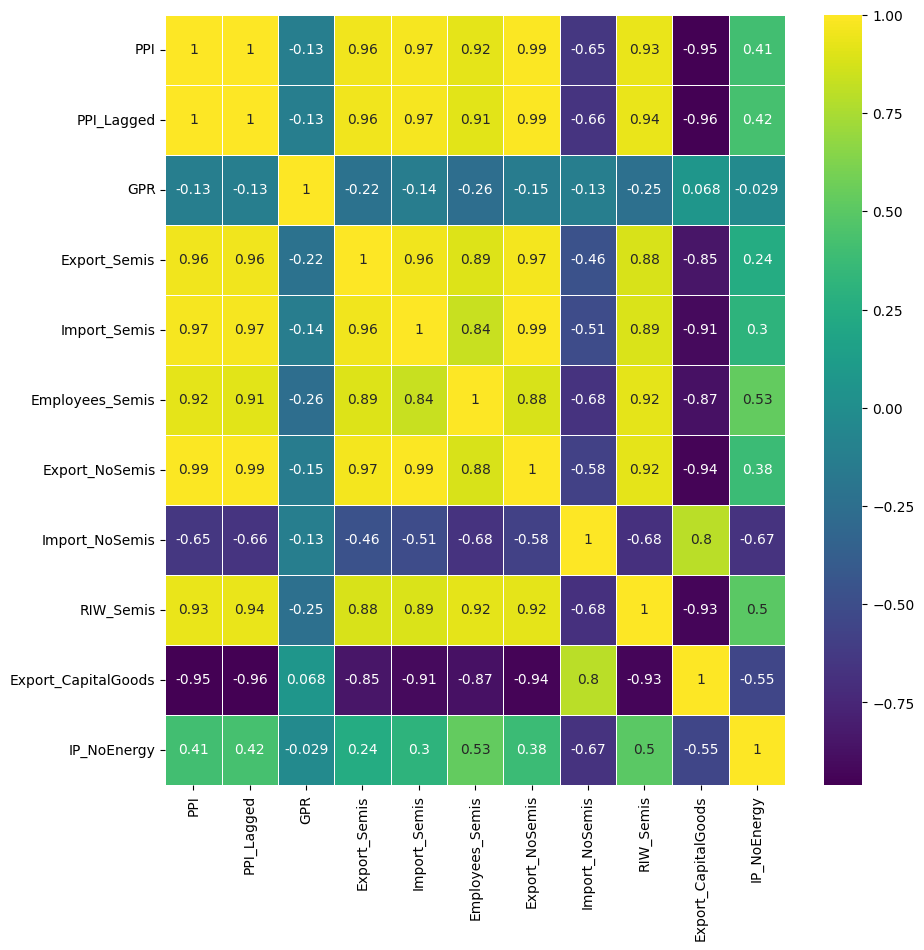

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidth=.5)

In [32]:
cdf_6M_GE = df[['PPI', 'PPI_Lagged', 'Export_Semis', 'Import_Semis', 'RIW_Semis']]
cdf_6M_GE.head(5)

,PPI,PPI_Lagged,Export_Semis,Import_Semis,RIW_Semis
0,4.658711,4.656813,4.952300,5.087596,1.047985
1,4.657763,4.656813,4.950177,5.083886,1.072884
2,4.651099,4.657763,4.957938,5.075799,1.084209
3,4.646312,4.657763,4.955827,5.085743,1.110640
4,4.640537,4.658711,4.938065,5.084505,1.147783


In [33]:
X = cdf_6M_GE.drop('PPI', axis=1) # Features
y = cdf_6M_GE['PPI'] # Target variable

split_idx = int(len(cdf_6M_GE)*0.7) # index to split at last entry
X_train = cdf_6M_GE.iloc[:split_idx, 1:] # train features
y_train = cdf_6M_GE.iloc[:split_idx, 0] # train target
X_test = cdf_6M_GE.iloc[split_idx:, 1:] # test features
y_test = cdf_6M_GE.iloc[split_idx:, 0] # test target

# Defining Parameters

C_arr = [0.1,1.0,10,100,1000]
eps_arr = [0.1,0.01,0.001,0.0001,0.00001]

# Hyper tuning SVR Model

hyper_arr = []
hyper_cols =  ['c','epsilon','correlation']
for C in C_arr:
    for epsilon in eps_arr:
        model = SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        corr = stats.pearsonr(y_test,y_pred)[0]
        hyper_arr.append([C,epsilon,corr])

hyper_df = pd.DataFrame(hyper_arr,columns= hyper_cols)
hyper_df = hyper_df.sort_values(by=['correlation'], ascending=False)
hyper_df

,c,epsilon,correlation
12,10.0,0.00100,0.907080
13,10.0,0.00010,0.906048
14,10.0,0.00001,0.905901
11,10.0,0.01000,0.901482
17,100.0,0.00100,0.899779
7,1.0,0.00100,0.897384
18,100.0,0.00010,0.897323
19,100.0,0.00001,0.896860
8,1.0,0.00010,0.896766
16,100.0,0.01000,0.896431


In [34]:
# Building SVR model with best parameters
model_svr = SVR(kernel='rbf', C=hyper_df.c.iloc[0], epsilon=hyper_df.epsilon.iloc[0]) # set kernel and hyperparameters
svr = model_svr.fit(X_train, y_train)
result_df = pd.DataFrame([],columns=[])
result_df['svr_predicted'] = model_svr.predict(X_test) # SVR
result_df['true'] = y_test.values
result_df['svr_error'] = abs(result_df['true'] - result_df['svr_predicted'])
result_df

,svr_predicted,true,svr_error
0,4.079540,4.072440,0.007100
1,4.069523,4.074142,0.004619
2,4.067813,4.072440,0.004627
3,4.068748,4.074142,0.005394
4,4.066097,4.074142,0.008045
...,...,...,...
99,4.040201,4.039924,0.000277
100,4.044562,4.048527,0.003966
101,4.048146,4.052446,0.004300
102,4.051736,4.053141,0.001404


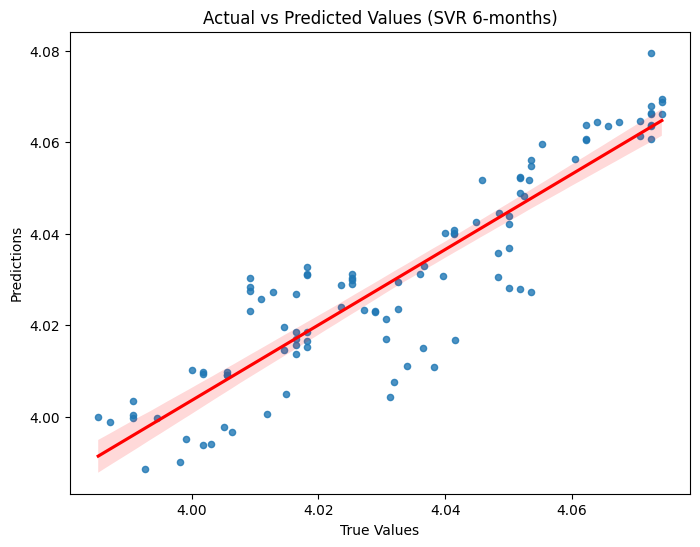

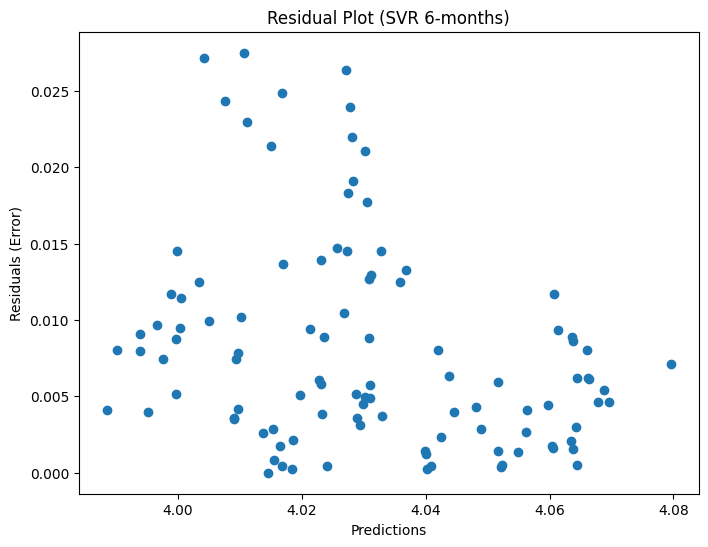

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=y_test, y=result_df['svr_predicted'], scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (SVR 6-months)")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
# plot the residual plot
plt.scatter(result_df['svr_predicted'], result_df['svr_error'])
plt.xlabel("Predictions")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot (SVR 6-months)")
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_svr = model_svr.predict(X_test)
mae = mean_absolute_error(result_df['true'], result_df['svr_predicted'])
mse = mean_squared_error(result_df['true'], result_df['svr_predicted'])
r2 = r2_score(result_df['true'], result_df['svr_predicted'])

#print the parameters
print("C:", model_svr.C)
print("Epsilon:", model_svr.epsilon)

# print the scores
print("SVR Correlation : ", stats.pearsonr(y_test,y_svr)[0])
print("SVR MAE:", mae)
print("SVR MSE:", "{:.6f}".format(mse))
print("SVR R2 score:", r2)

# from sklearn.model_selection import TimeSeriesSplit

# n_splits = 5

# # Define the TimeSeriesSplit object
# tscv = TimeSeriesSplit(n_splits=n_splits)

# # Create empty lists to store the results
# mae_list = []
# mse_list = []
# r2_list = []

# # Loop through each split and fit the model
# for train_index, test_index in tscv.split(X):

#     # Split the data into train and test sets based on the current fold
#     X_train, X_test = X.iloc[:train_index[-1]+1, :], X.iloc[train_index[-1]+1:test_index[-1]+1, :]
#     y_train, y_test = y.iloc[:train_index[-1]+1], y.iloc[train_index[-1]+1:test_index[-1]+1]

#     # Fit the model on the training data
#     model_svr.fit(X_train, y_train)

#     # Predict on the test data
#     y_pred = model_svr.predict(X_test)

#     # Calculate the evaluation metrics for the current fold
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     # Append the results to the lists
#     mae_list.append(mae)
#     mse_list.append(mse)
#     r2_list.append(r2)

# # Calculate the average evaluation metrics across all folds
# mae_avg = sum(mae_list)/n_splits
# mse_avg = sum(mse_list)/n_splits
# r2_avg = sum(r2_list)/n_splits

# # Print the results
# print("\nForward Chaining SVR MAE: {:.4f}".format(mae_avg))
# print("Forward Chaining SVR MSE: {:.4f}".format(mse_avg))
# print("Forward Chaining SVR R2 score: {:.4f}".format(r2_avg))

C: 10.0
Epsilon: 0.001
SVR Correlation :  0.9070804013314808
SVR MAE: 0.008124093529796723
SVR MSE: 0.000113
SVR R2 score: 0.8148858680361848


In [37]:
train_y_pred = model_svr.predict(X_train)
train_mape = np.mean(np.abs((y_train - train_y_pred) / y_train)) * 100
print("Train MAPE: {:.8f}%".format(train_mape))

# test_mape = np.mean(np.abs((result_df['true'] - result_df['svr_predicted']) / result_df['true'])) * 100
test_mape = np.mean(np.abs((y_test-y_svr) / y_test)) * 100
print("Test MAPE: {:.8f}%".format(test_mape))

Train MAPE: 0.19386834%
Test MAPE: 0.20158626%


In [38]:
train_actual = y_train.reset_index(drop=True)
train_pred = pd.DataFrame(model_svr.predict(X_train), columns=['PPI_pred'])

# Create dataframes for actual and predicted values of test set
test_actual = y_test.reset_index(drop=True)
test_pred = pd.DataFrame(y_svr, columns=['PPI_pred'])

# Concatenate actual and predicted values for train and test sets
train_df = pd.concat([train_actual, train_pred], axis=1)
test_df = pd.concat([test_actual, test_pred], axis=1)

# Calculate MAPE for train and test sets separately
train_df['MAPE'] = np.abs(train_df['PPI'] - train_df['PPI_pred']) / train_df['PPI']
test_df['MAPE'] = np.abs(test_df['PPI'] - test_df['PPI_pred']) / test_df['PPI']

# Print train and test MAPE results
print("Train MAPE: {:.8%}".format(train_df['MAPE'].mean()))
print("Test MAPE: {:.8%}".format(test_df['MAPE'].mean()))

Train MAPE: 0.19386834%
Test MAPE: 0.20158626%


In [39]:
train_df

,PPI,PPI_pred,MAPE
0,4.658711,4.656274,0.000523
1,4.657763,4.653098,0.001001
2,4.651099,4.650860,0.000051
3,4.646312,4.649672,0.000723
4,4.640537,4.646752,0.001339
...,...,...,...
235,4.075841,4.088486,0.003102
236,4.074142,4.087051,0.003169
237,4.074142,4.084609,0.002569
238,4.072440,4.078922,0.001592


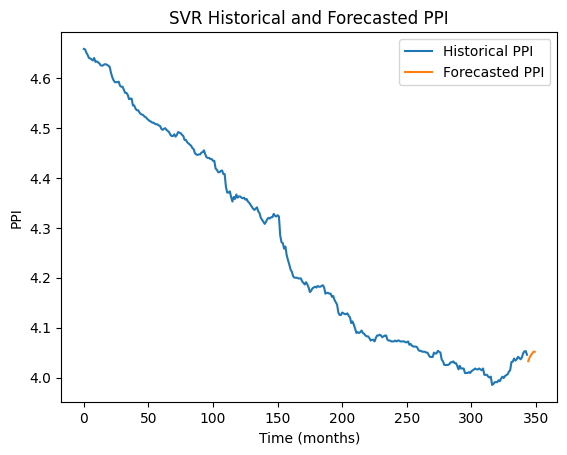

Forecasted PPI for the next 6 months:
[[4.03288067]
 [4.04020075]
 [4.04456182]
 [4.04814582]
 [4.05173635]
 [4.0517225 ]]


In [40]:
# CODE IS RUNNING NEED TO UPDATE THE FEATURES IN THE CDF TABLE BASED ON THE INPUTS AT THE MODELING

# define the predictor variables for the forecast
X = cdf_6M_GE[['PPI_Lagged', 'Export_Semis', 'Import_Semis', 'RIW_Semis']].tail(6)

# predict the target variable for the next 6 months
y_pred = model_svr.predict(X)

# create a new DataFrame for the predicted values
forecast_df = pd.DataFrame(data=y_pred, columns=['PPI'])

# set the index to the next 6 months
forecast_index = pd.date_range(start=cdf_6M_GE.index[-1], periods=6, freq='MS')
forecast_df.set_index(forecast_index, inplace=True)

# plot the actual and forecasted values
plt.plot(range(len(cdf_6M_GE)), cdf_6M_GE['PPI'], label='Historical PPI')
plt.plot(range(len(cdf_6M_GE),len(cdf_6M_GE)+6), forecast_df['PPI'], label='Forecasted PPI')
plt.xlabel('Time (months)')
plt.ylabel('PPI')
plt.title('SVR Historical and Forecasted PPI')
plt.legend()
plt.show()

print("Forecasted PPI for the next 6 months:")
print(forecast_df.values)

**12 months Forecast**

In [41]:
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-12M.xlsx")

In [42]:
df.columns

Index(['Date', 'PPI', 'PPI_Lagged', 'GPR', 'Export_Semis', 'Import_Semis',
       'Employees_Semis', 'Export_NoSemis', 'Import_NoSemis', 'RIW_Semis',
       'Export_CapitalGoods', 'IP_NoEnergy'],
      dtype='object')

<ipython-input-43-4d6f96c67db9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidth=.5)


<Axes: >

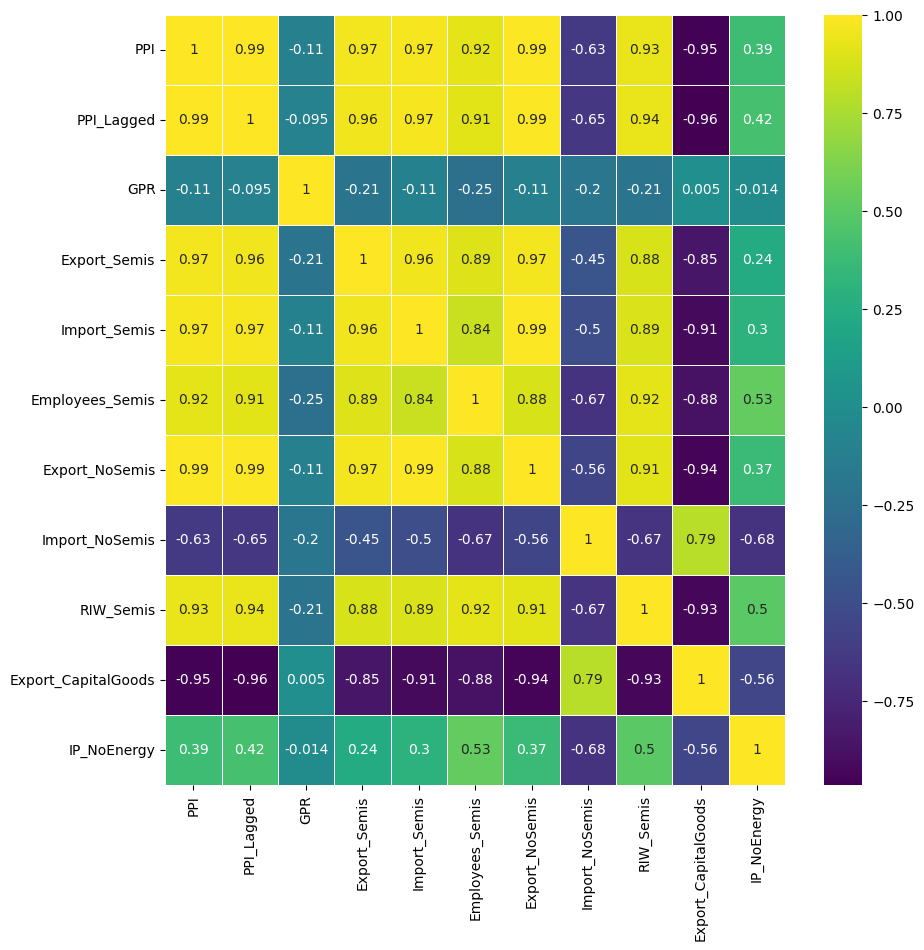

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidth=.5)

<ipython-input-44-af785ddfd842>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['PPI'].drop('PPI').sort_values().plot(kind='bar')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Export_CapitalGoods'),
  Text(1, 0, 'Import_NoSemis'),
  Text(2, 0, 'GPR'),
  Text(3, 0, 'IP_NoEnergy'),
  Text(4, 0, 'Employees_Semis'),
  Text(5, 0, 'RIW_Semis'),
  Text(6, 0, 'Export_Semis'),
  Text(7, 0, 'Import_Semis'),
  Text(8, 0, 'Export_NoSemis'),
  Text(9, 0, 'PPI_Lagged')])

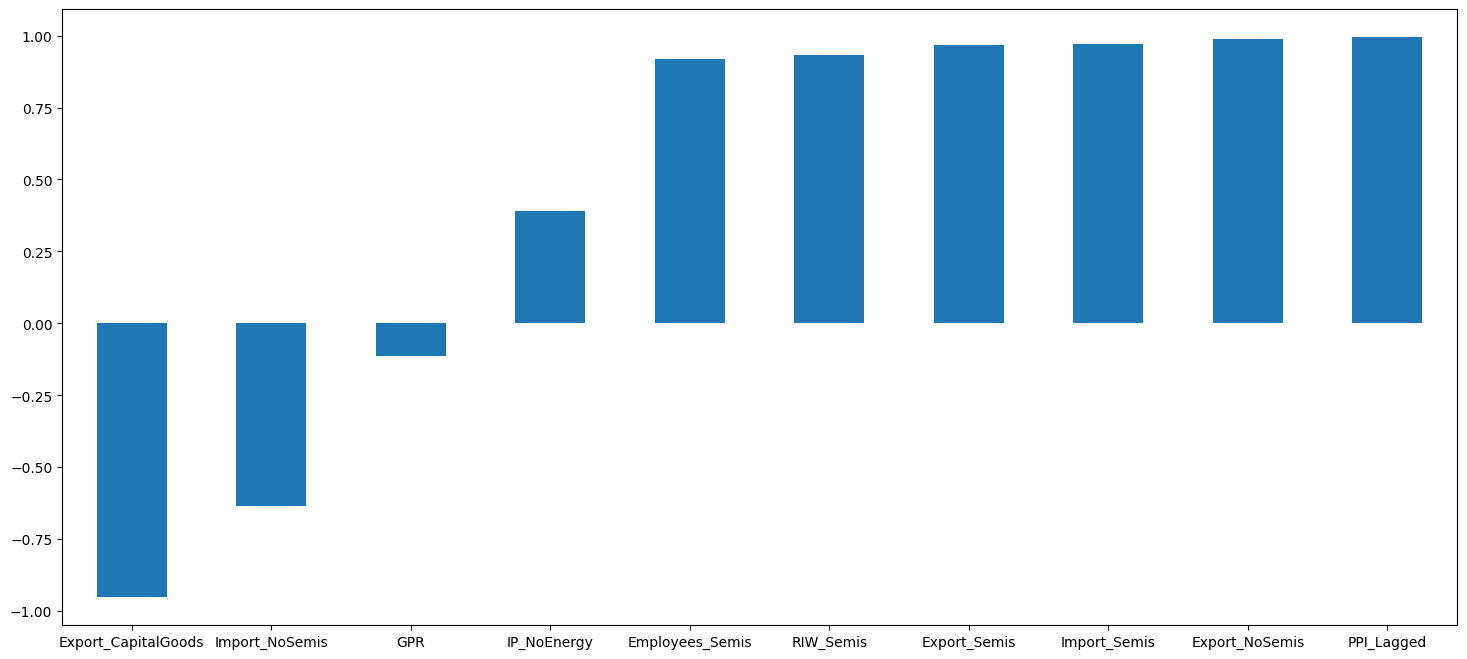

In [44]:
plt.figure(figsize=(18,8))
df.corr()['PPI'].drop('PPI').sort_values().plot(kind='bar')
plt.xticks(rotation='horizontal')

In [45]:
cdf_12M_GE = df[['PPI', 'PPI_Lagged', 'Export_Semis', 'RIW_Semis']]
cdf_12M_GE.tail(5)

,PPI,PPI_Lagged,Export_Semis,RIW_Semis
333,4.039924,4.005058,4.117410,0.409258
334,4.048527,4.006369,4.110874,0.391772
335,4.052446,4.011886,4.109233,0.382333
336,4.053141,4.014941,4.105944,0.375487
337,4.045749,4.031334,4.109233,0.351150


In [46]:
X = cdf_12M_GE.drop('PPI', axis=1) # Features
y = cdf_12M_GE['PPI'] # Target variable

split_idx = int(len(cdf_12M_GE)*0.7) # index to split at last entry
X_train = cdf_12M_GE.iloc[:split_idx, 1:] # train features
y_train = cdf_12M_GE.iloc[:split_idx, 0] # train target
X_test = cdf_12M_GE.iloc[split_idx:, 1:] # test features
y_test = cdf_12M_GE.iloc[split_idx:, 0] # test target

# Defining Parameters

C_arr = [0.1,1.0,10,100,1000]
eps_arr = [0.1,0.01,0.001,0.0001,0.00001]

# Hyper tuning SVR Model

hyper_arr = []
hyper_cols =  ['c','epsilon','correlation']
for C in C_arr:
    for epsilon in eps_arr:
        model = SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        corr = stats.pearsonr(y_test,y_pred)[0]
        hyper_arr.append([C,epsilon,corr])

hyper_df = pd.DataFrame(hyper_arr,columns= hyper_cols)
hyper_df = hyper_df.sort_values(by=['correlation'], ascending=False)
hyper_df

,c,epsilon,correlation
12,10.0,0.00100,0.800877
14,10.0,0.00001,0.800451
13,10.0,0.00010,0.800397
11,10.0,0.01000,0.800106
9,1.0,0.00001,0.796183
8,1.0,0.00010,0.796063
7,1.0,0.00100,0.795310
6,1.0,0.01000,0.787068
24,1000.0,0.00001,0.774674
23,1000.0,0.00010,0.774153


In [47]:
# Building SVR model with best parameters
model_svr = SVR(kernel='rbf', C=hyper_df.c.iloc[0], epsilon=hyper_df.epsilon.iloc[0]) # set kernel and hyperparameters
svr = model_svr.fit(X_train, y_train)
result_df = pd.DataFrame([],columns=[])
result_df['svr_predicted'] = model_svr.predict(X_test) # SVR
result_df['true'] = y_test.values
result_df['svr_error'] = abs(result_df['true'] - result_df['svr_predicted'])
result_df.head(5)

,svr_predicted,true,svr_error
0,4.081095,4.072440,0.008655
1,4.078649,4.074142,0.004507
2,4.072106,4.074142,0.002035
3,4.072812,4.072440,0.000372
4,4.071407,4.072440,0.001033


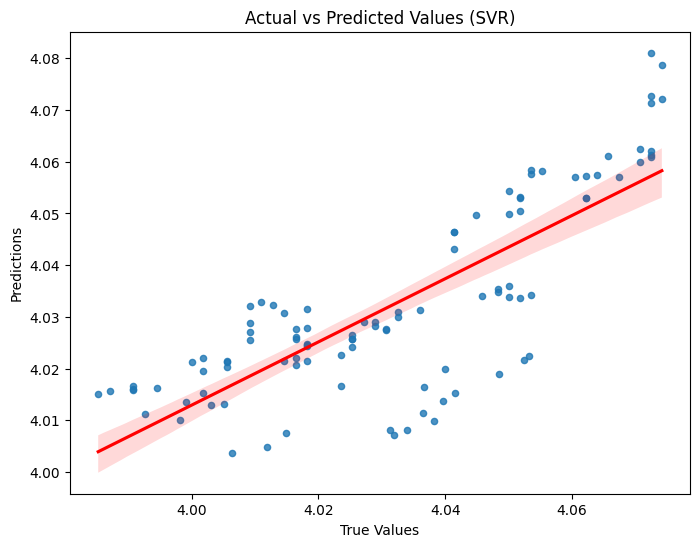

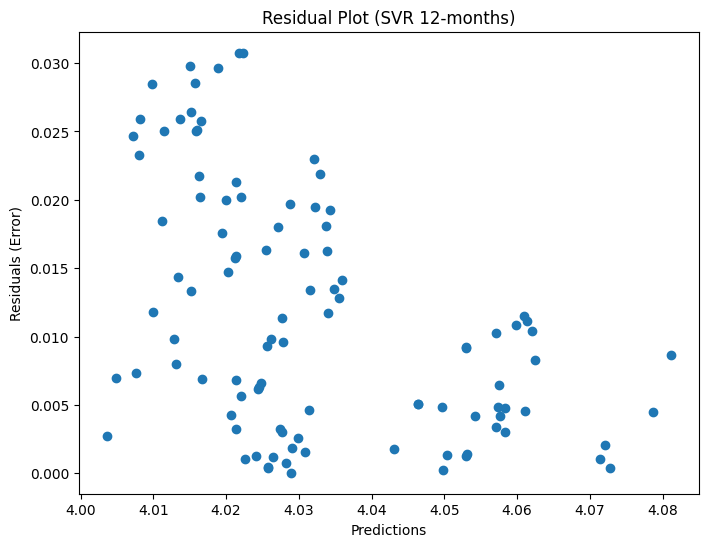

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=y_test, y=result_df['svr_predicted'], scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (SVR)")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
# plot the residual plot
plt.scatter(result_df['svr_predicted'], result_df['svr_error'])
plt.xlabel("Predictions")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot (SVR 12-months)")
plt.show()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_svr = model_svr.predict(X_test)
mae = mean_absolute_error(result_df['true'], result_df['svr_predicted'])
mse = mean_squared_error(result_df['true'], result_df['svr_predicted'])
r2 = r2_score(result_df['true'], result_df['svr_predicted'])

#print the parameters
print("C:", model_svr.C)
print("Epsilon:", model_svr.epsilon)

# print the scores
print("SVR Correlation : ", stats.pearsonr(y_test,y_svr)[0])
print("SVR MAE:", mae)
print("SVR MSE:", "{:.6f}".format(mse))
print("SVR R2 score:", r2)

# from sklearn.model_selection import TimeSeriesSplit

# n_splits = 5

# # Define the TimeSeriesSplit object
# tscv = TimeSeriesSplit(n_splits=n_splits)

# # Create empty lists to store the results
# mae_list = []
# mse_list = []
# r2_list = []

# # Loop through each split and fit the model
# for train_index, test_index in tscv.split(X):

#     # Split the data into train and test sets based on the current fold
#     X_train, X_test = X.iloc[:train_index[-1]+1, :], X.iloc[train_index[-1]+1:test_index[-1]+1, :]
#     y_train, y_test = y.iloc[:train_index[-1]+1], y.iloc[train_index[-1]+1:test_index[-1]+1]

#     # Fit the model on the training data
#     model_svr.fit(X_train, y_train)

#     # Predict on the test data
#     y_pred = model_svr.predict(X_test)

#     # Calculate the evaluation metrics for the current fold
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     # Append the results to the lists
#     mae_list.append(mae)
#     mse_list.append(mse)
#     r2_list.append(r2)

# # Calculate the average evaluation metrics across all folds
# mae_avg = sum(mae_list)/n_splits
# mse_avg = sum(mse_list)/n_splits
# r2_avg = sum(r2_list)/n_splits

# # Print the results
# print("\nForward Chaining SVR MAE: {:.4f}".format(mae_avg))
# print("Forward Chaining SVR MSE: {:.4f}".format(mse_avg))
# print("Forward Chaining SVR R2 score: {:.4f}".format(r2_avg))

C: 10.0
Epsilon: 0.001
SVR Correlation :  0.8008769376597382
SVR MAE: 0.011575352378897268
SVR MSE: 0.000213
SVR R2 score: 0.6395533217456775


In [50]:
train_y_pred = model_svr.predict(X_train)
train_mape = np.mean(np.abs((y_train - train_y_pred) / y_train)) * 100
print("Train MAPE: {:.8f}%".format(train_mape))

# test_mape = np.mean(np.abs((result_df['true'] - result_df['svr_predicted']) / result_df['true'])) * 100
test_mape = np.mean(np.abs((y_test-y_svr) / y_test)) * 100
print("Test MAPE: {:.8f}%".format(test_mape))

Train MAPE: 0.26260012%
Test MAPE: 0.28753683%


In [51]:
train_actual = y_train.reset_index(drop=True)
train_pred = pd.DataFrame(model_svr.predict(X_train), columns=['PPI_pred'])

# Create dataframes for actual and predicted values of test set
test_actual = y_test.reset_index(drop=True)
test_pred = pd.DataFrame(y_svr, columns=['PPI_pred'])

# Concatenate actual and predicted values for train and test sets
train_df = pd.concat([train_actual, train_pred], axis=1)
test_df = pd.concat([test_actual, test_pred], axis=1)

# Calculate MAPE for train and test sets separately
train_df['MAPE'] = np.abs(train_df['PPI'] - train_df['PPI_pred']) / train_df['PPI']
test_df['MAPE'] = np.abs(test_df['PPI'] - test_df['PPI_pred']) / test_df['PPI']

# Print train and test MAPE results
print("Train MAPE: {:.8%}".format(train_df['MAPE'].mean()))
print("Test MAPE: {:.8%}".format(test_df['MAPE'].mean()))

Train MAPE: 0.26260012%
Test MAPE: 0.28753683%


In [52]:
test_df

,PPI,PPI_pred,MAPE
0,4.072440,4.081095,0.002125
1,4.074142,4.078649,0.001106
2,4.074142,4.072106,0.000500
3,4.072440,4.072812,0.000091
4,4.072440,4.071407,0.000254
...,...,...,...
97,4.039924,4.019945,0.004945
98,4.048527,4.018874,0.007325
99,4.052446,4.021704,0.007586
100,4.053141,4.022385,0.007588


In [53]:
# CODE IS RUNNING NEED TO UPDATE THE FEATURES IN THE CDF TABLE BASED ON THE INPUTS AT THE MODELING

# # define the predictor variables for the forecast
# X = cdf_12M_GE[['PPI_Lagged', 'GPR', 'Export_Semis', 'Import_Semis',
#        'Employees_Semis', 'Export_NoSemis', 'Import_NoSemis','Export_CapitalGoods']].tail(12)

# # predict the target variable for the next 6 months
# y_pred = model_svr.predict(X)

# # create a new DataFrame for the predicted values
# forecast_df = pd.DataFrame(data=y_pred, columns=['PPI'])

# # set the index to the next 6 months
# forecast_index = pd.date_range(start=cdf_12M_GE.index[-1], periods=12, freq='MS')
# forecast_df.set_index(forecast_index, inplace=True)

# # plot the actual and forecasted values
# plt.plot(range(len(cdf_12M_GE)), cdf_12M_GE['PPI'], label='Historical PPI')
# plt.plot(range(len(cdf_12M_GE),len(cdf_12M_GE)+12), forecast_df['PPI'], label='PPI')
# plt.xlabel('Time (months)')
# plt.ylabel('PPI')
# plt.title('SVR Historical and Forecasted PPI')
# plt.legend()
# plt.show()

# print("Forecasted PPI for the next 12 months:")
# print(forecast_df.values)

**24 Months Forecast**

In [54]:
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-24M.xlsx")

In [55]:
df.columns

Index(['Date', 'PPI', 'PPI_Lagged', 'GPR', 'Export_Semis', 'Import_Semis',
       'Employees_Semis', 'Export_NoSemis', 'Import_NoSemis', 'RIW_Semis',
       'Export_CapitalGoods', 'IP_NoEnergy'],
      dtype='object')

<ipython-input-56-4d6f96c67db9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidth=.5)


<Axes: >

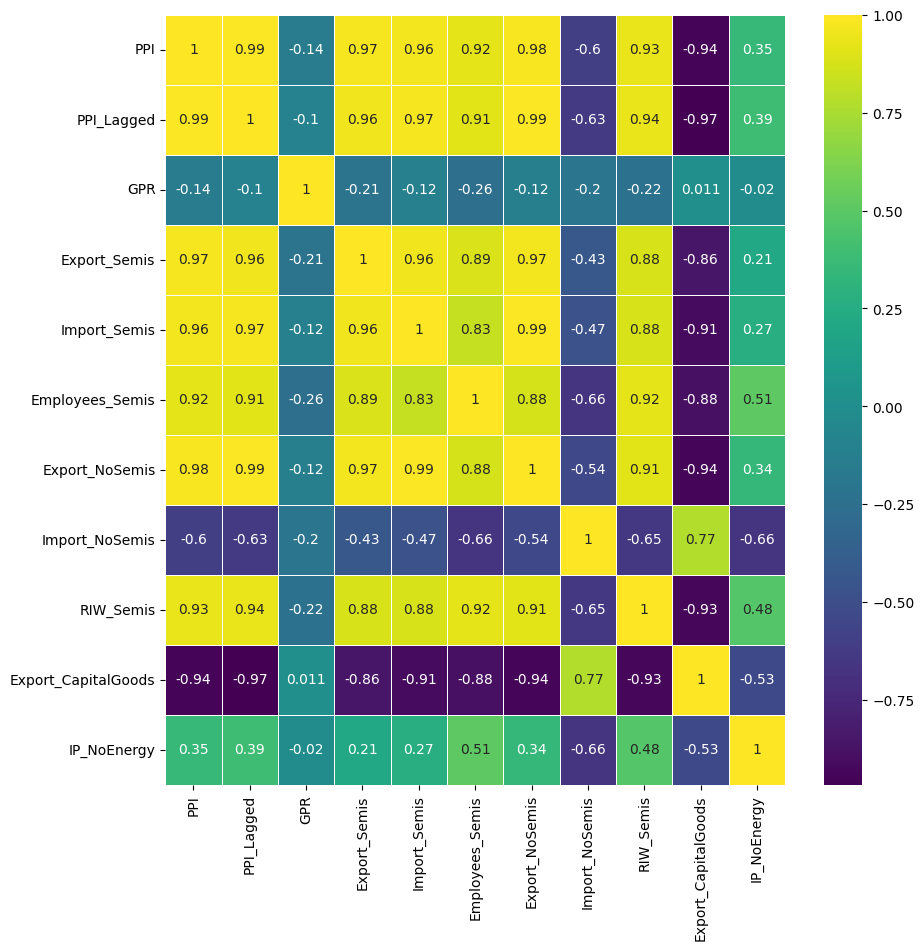

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidth=.5)

<ipython-input-57-af785ddfd842>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['PPI'].drop('PPI').sort_values().plot(kind='bar')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Export_CapitalGoods'),
  Text(1, 0, 'Import_NoSemis'),
  Text(2, 0, 'GPR'),
  Text(3, 0, 'IP_NoEnergy'),
  Text(4, 0, 'Employees_Semis'),
  Text(5, 0, 'RIW_Semis'),
  Text(6, 0, 'Import_Semis'),
  Text(7, 0, 'Export_Semis'),
  Text(8, 0, 'Export_NoSemis'),
  Text(9, 0, 'PPI_Lagged')])

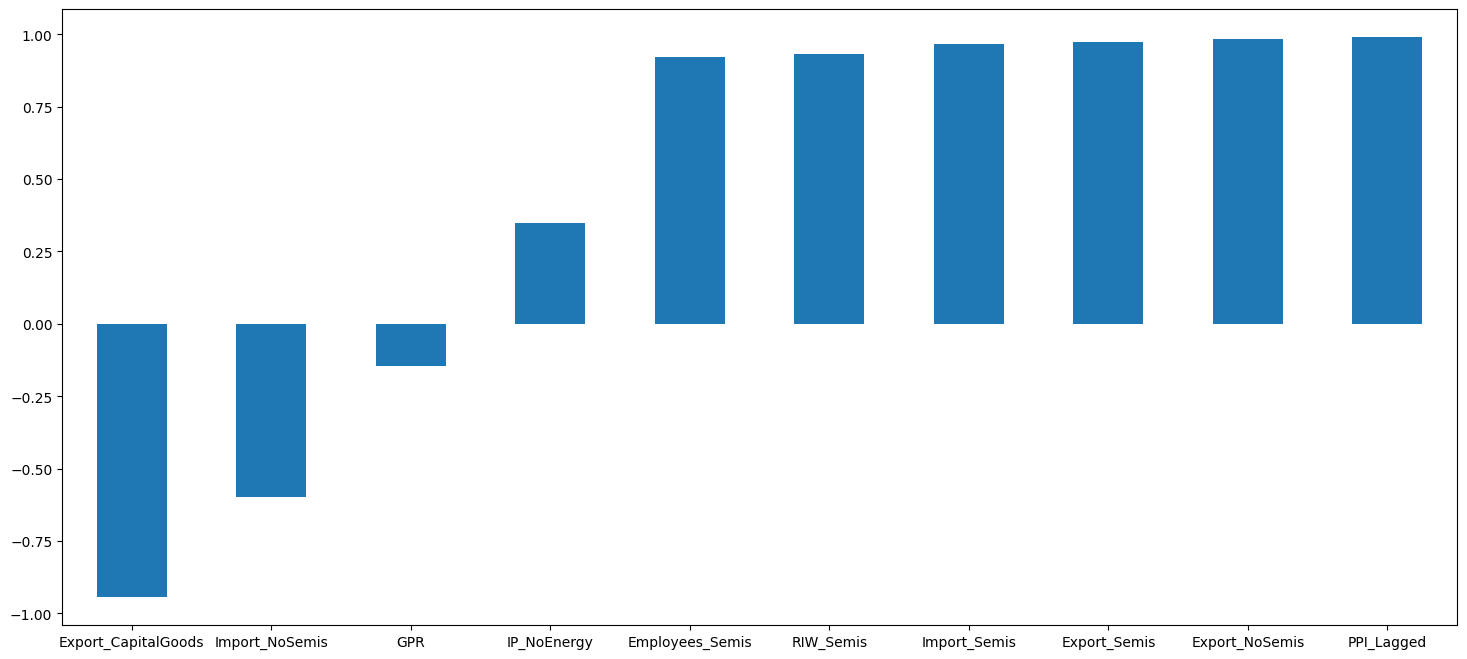

In [57]:
plt.figure(figsize=(18,8))
df.corr()['PPI'].drop('PPI').sort_values().plot(kind='bar')
plt.xticks(rotation='horizontal')

In [58]:
cdf_24M_GE = df[['PPI','PPI_Lagged', 'GPR', 'Export_Semis', 'Import_Semis','Employees_Semis','RIW_Semis' ,'Export_NoSemis', 'Export_CapitalGoods']]
cdf_24M_GE.tail(5)

,PPI,PPI_Lagged,GPR,Export_Semis,Import_Semis,Employees_Semis,RIW_Semis,Export_NoSemis,Export_CapitalGoods
321,4.039924,4.001864,4.386733,4.112512,4.025352,5.900993,0.501502,3.772761,4.916325
322,4.048527,3.985273,4.331827,4.112512,4.019980,5.901266,0.507841,3.761200,4.916325
323,4.052446,3.987130,4.249459,4.112512,4.019980,5.898252,0.498044,3.754199,4.914858
324,4.053141,3.990834,4.159934,4.112512,4.023564,5.900171,0.475551,3.747148,4.916325
325,4.045749,3.990834,4.362087,4.112512,4.028917,5.902360,0.461089,3.756538,4.920711


In [59]:
X = cdf_24M_GE.drop('PPI', axis=1) # Features
y = cdf_24M_GE['PPI'] # Target variable

split_idx = int(len(cdf_24M_GE)*0.7) # index to split at last entry
X_train = cdf_24M_GE.iloc[:split_idx, 1:] # train features
y_train = cdf_24M_GE.iloc[:split_idx, 0] # train target
X_test = cdf_24M_GE.iloc[split_idx:, 1:] # test features
y_test = cdf_24M_GE.iloc[split_idx:, 0] # test target

# Defining Parameters

C_arr = [0.1,1.0,10,100,1000]
eps_arr = [0.1,0.01,0.001,0.0001,0.00001]

# Hyper tuning SVR Model

hyper_arr = []
hyper_cols =  ['c','epsilon','correlation']
for C in C_arr:
    for epsilon in eps_arr:
        model = SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        corr = stats.pearsonr(y_test,y_pred)[0]
        hyper_arr.append([C,epsilon,corr])

hyper_df = pd.DataFrame(hyper_arr,columns= hyper_cols)
hyper_df = hyper_df.sort_values(by=['correlation'], ascending=False)
hyper_df

,c,epsilon,correlation
24,1000.0,0.00001,0.784875
23,1000.0,0.00010,0.780350
13,10.0,0.00010,0.769040
14,10.0,0.00001,0.768902
9,1.0,0.00001,0.763497
8,1.0,0.00010,0.763451
12,10.0,0.00100,0.760465
7,1.0,0.00100,0.759337
11,10.0,0.01000,0.759278
6,1.0,0.01000,0.751377


In [60]:
# Building SVR model with best parameters
model_svr = SVR(kernel='rbf', C=hyper_df.c.iloc[0], epsilon=hyper_df.epsilon.iloc[0]) # set kernel and hyperparameters
svr = model_svr.fit(X_train, y_train)
result_df = pd.DataFrame([],columns=[])
result_df['svr_predicted'] = model_svr.predict(X_test) # SVR
result_df['true'] = y_test.values
result_df['svr_error'] = abs(result_df['true'] - result_df['svr_predicted'])
result_df.head(5)

,svr_predicted,true,svr_error
0,4.075007,4.072440,0.002567
1,4.073505,4.072440,0.001066
2,4.072437,4.072440,0.000003
3,4.069908,4.070735,0.000826
4,4.062131,4.070735,0.008604


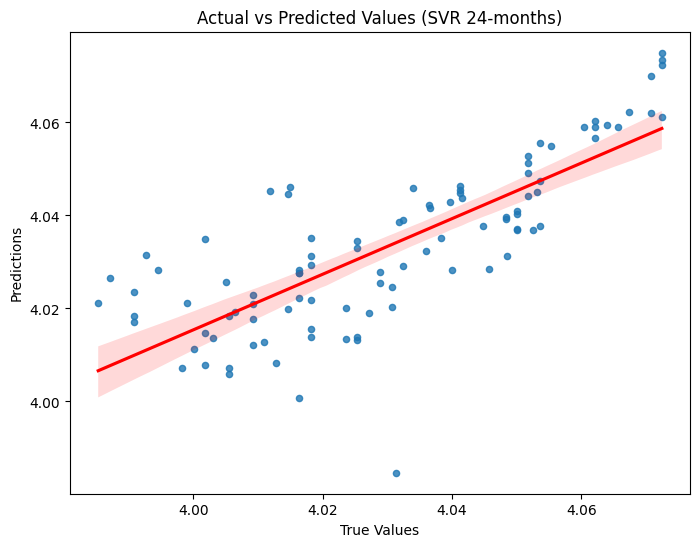

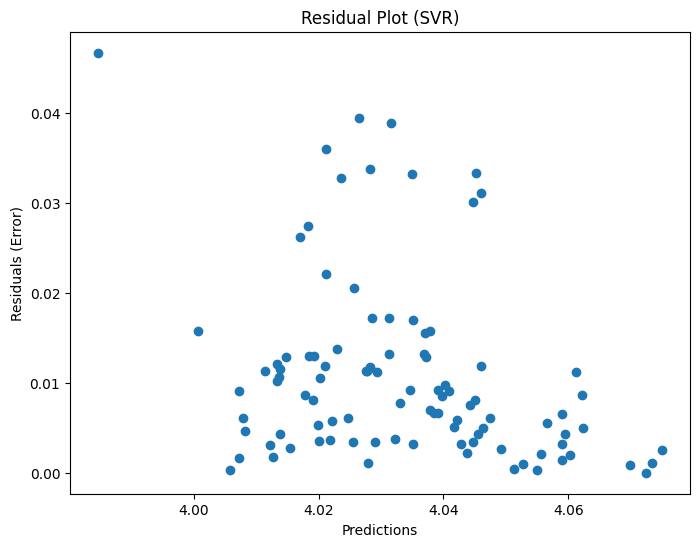

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=y_test, y=result_df['svr_predicted'], scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (SVR 24-months)")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
# plot the residual plot
plt.scatter(result_df['svr_predicted'], result_df['svr_error'])
plt.xlabel("Predictions")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot (SVR)")
plt.show()

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_svr = model_svr.predict(X_test)
mae = mean_absolute_error(result_df['true'], result_df['svr_predicted'])
mse = mean_squared_error(result_df['true'], result_df['svr_predicted'])
r2 = r2_score(result_df['true'], result_df['svr_predicted'])

#print the parameters
print("C:", model_svr.C)
print("Epsilon:", model_svr.epsilon)

# print the scores
print("SVR Correlation : ", stats.pearsonr(y_test,y_svr)[0])
print("SVR MAE:", mae)
print("SVR MSE:", "{:.6f}".format(mse))
print("SVR R2 score:", r2)

# from sklearn.model_selection import TimeSeriesSplit

# n_splits = 5

# # Define the TimeSeriesSplit object
# tscv = TimeSeriesSplit(n_splits=n_splits)

# # Create empty lists to store the results
# mae_list = []
# mse_list = []
# r2_list = []

# # Loop through each split and fit the model
# for train_index, test_index in tscv.split(X):

#     # Split the data into train and test sets based on the current fold
#     X_train, X_test = X.iloc[:train_index[-1]+1, :], X.iloc[train_index[-1]+1:test_index[-1]+1, :]
#     y_train, y_test = y.iloc[:train_index[-1]+1], y.iloc[train_index[-1]+1:test_index[-1]+1]

#     # Fit the model on the training data
#     model_svr.fit(X_train, y_train)

#     # Predict on the test data
#     y_pred = model_svr.predict(X_test)

#     # Calculate the evaluation metrics for the current fold
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     # Append the results to the lists
#     mae_list.append(mae)
#     mse_list.append(mse)
#     r2_list.append(r2)

# # Calculate the average evaluation metrics across all folds
# mae_avg = sum(mae_list)/n_splits
# mse_avg = sum(mse_list)/n_splits
# r2_avg = sum(r2_list)/n_splits

# # Print the results
# print("\nForward Chaining SVR MAE: {:.4f}".format(mae_avg))
# print("Forward Chaining SVR MSE: {:.4f}".format(mse_avg))
# print("Forward Chaining SVR R2 score: {:.4f}".format(r2_avg))

C: 1000.0
Epsilon: 1e-05
SVR Correlation :  0.7848751900059843
SVR MAE: 0.010825592501701528
SVR MSE: 0.000219
SVR R2 score: 0.5959849836544294


In [63]:
train_y_pred = model_svr.predict(X_train)
train_mape = np.mean(np.abs((y_train - train_y_pred) / y_train)) * 100
print("Train MAPE: {:.8f}%".format(train_mape))

# test_mape = np.mean(np.abs((result_df['true'] - result_df['svr_predicted']) / result_df['true'])) * 100
test_mape = np.mean(np.abs((y_test-y_svr) / y_test)) * 100
print("Test MAPE: {:.8f}%".format(test_mape))

Train MAPE: 0.11575111%
Test MAPE: 0.26938581%


In [64]:
train_actual = y_train.reset_index(drop=True)
train_pred = pd.DataFrame(model_svr.predict(X_train), columns=['PPI_pred'])

# Create dataframes for actual and predicted values of test set
test_actual = y_test.reset_index(drop=True)
test_pred = pd.DataFrame(y_svr, columns=['PPI_pred'])

# Concatenate actual and predicted values for train and test sets
train_df = pd.concat([train_actual, train_pred], axis=1)
test_df = pd.concat([test_actual, test_pred], axis=1)

# Calculate MAPE for train and test sets separately
train_df['MAPE'] = np.abs(train_df['PPI'] - train_df['PPI_pred']) / train_df['PPI']
test_df['MAPE'] = np.abs(test_df['PPI'] - test_df['PPI_pred']) / test_df['PPI']

# Print train and test MAPE results
print("Train MAPE: {:.8%}".format(train_df['MAPE'].mean()))
print("Test MAPE: {:.8%}".format(test_df['MAPE'].mean()))

Train MAPE: 0.11575111%
Test MAPE: 0.26938581%


In [65]:
test_df

,PPI,PPI_pred,MAPE
0,4.072440,4.075007,6.302979e-04
1,4.072440,4.073505,2.616501e-04
2,4.072440,4.072437,6.246552e-07
3,4.070735,4.069908,2.030300e-04
4,4.070735,4.062131,2.113598e-03
...,...,...,...
93,4.039924,4.028287,2.880277e-03
94,4.048527,4.031294,4.256818e-03
95,4.052446,4.036969,3.819113e-03
96,4.053141,4.045103,1.983158e-03


In [66]:
# CODE IS RUNNING NEED TO UPDATE THE FEATURES IN THE CDF TABLE BASED ON THE INPUTS AT THE MODELING

# # define the predictor variables for the forecast
# X = cdf_24M_GE[['PPI_Lagged', 'Import_Semis',
#         'Employees_Semis', 'Export_CapitalGoods','Export_NoSemis', 'Import_NoSemis']].tail(24)

# # predict the target variable for the next 6 months
# y_pred = model_svr.predict(X)

# # create a new DataFrame for the predicted values
# forecast_df = pd.DataFrame(data=y_pred, columns=['PPI'])

# # set the index to the next 6 months
# forecast_index = pd.date_range(start=cdf_24M_GE.index[-1], periods=24, freq='MS')
# forecast_df.set_index(forecast_index, inplace=True)

# # plot the actual and forecasted values
# plt.plot(range(len(cdf_24M_GE)), cdf_24M_GE['PPI'], label='Historical PPI')
# plt.plot(range(len(cdf_24M_GE),len(cdf_24M_GE)+24), forecast_df['PPI'], label='PPI')
# plt.xlabel('Time (months)')
# plt.ylabel('PPI')
# plt.title('SVR Historical and Forecasted PPI')
# plt.legend()
# plt.show()

# print("Forecasted PPI for the next 24 months:")
# print(forecast_df.values)

**TESTING CODE**

**Forecast for 6 months**


In [67]:
#@title
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-6M.xlsx")

In [68]:
#@title
cdf_6M = df[['PPI', 'PPI_Lagged']]
cdf_6M

,PPI,PPI_Lagged
0,4.658711,4.656813
1,4.657763,4.656813
2,4.651099,4.657763
3,4.646312,4.657763
4,4.640537,4.658711
...,...,...
339,4.039924,4.038233
340,4.048527,4.034028
341,4.052446,4.036433
342,4.053141,4.041576


In [69]:
#@title
X = cdf_6M.drop('PPI', axis=1) # Features
y = cdf_6M['PPI'] # Target variable

split_idx = int(len(cdf_6M)*0.9) # index to split at last entry
X_train = cdf_6M.iloc[:split_idx, 1:] # train features
y_train = cdf_6M.iloc[:split_idx, 0] # train target
X_test = cdf_6M.iloc[split_idx:, 1:] # test features
y_test = cdf_6M.iloc[split_idx:, 0] # test target

# Defining Parameters

C_arr = [0.1,1.0,10,100,1000]
eps_arr = [0.1,0.01,0.001,0.0001,0.00001]

# Hyper tuning SVR Model

hyper_arr = []
hyper_cols =  ['c','epsilon','correlation']
for C in C_arr:
    for epsilon in eps_arr:
        model = SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        corr = stats.pearsonr(y_test,y_pred)[0]
        hyper_arr.append([C,epsilon,corr])

hyper_df = pd.DataFrame(hyper_arr,columns= hyper_cols)
hyper_df = hyper_df.sort_values(by=['correlation'], ascending=False)
hyper_df

,c,epsilon,correlation
14,10.0,0.00001,0.708131
13,10.0,0.00010,0.708110
17,100.0,0.00100,0.706961
1,0.1,0.01000,0.706926
18,100.0,0.00010,0.706459
12,10.0,0.00100,0.705285
4,0.1,0.00001,0.704792
3,0.1,0.00010,0.704703
2,0.1,0.00100,0.703757
19,100.0,0.00001,0.703504


In [70]:
#@title
# Building SVR model with best parameters
model_svr = SVR(kernel='rbf', C=10, epsilon=0.00001) # set kernel and hyperparameters
svr = model_svr.fit(X_train, y_train)
result_df = pd.DataFrame([],columns=[])
result_df['svr_predicted'] = model_svr.predict(X_test) # SVR
result_df['true'] = y_test.values
result_df['svr_error'] = abs(result_df['true'] - result_df['svr_predicted'])
result_df

,svr_predicted,true,svr_error
0,4.018315,4.018183,0.000132
1,4.017339,4.005513,0.011826
2,4.017339,4.005513,0.011826
3,4.018315,4.005513,0.012802
4,4.017339,4.001864,0.015476
5,4.016412,4.000034,0.016378
6,4.018315,4.001864,0.016451
7,4.012554,3.985273,0.027280
8,4.012554,3.987130,0.025423
9,4.012554,3.990834,0.021719


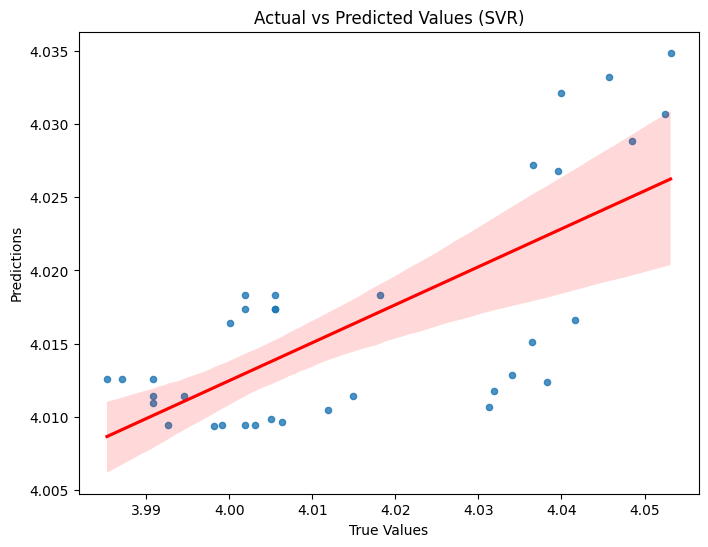

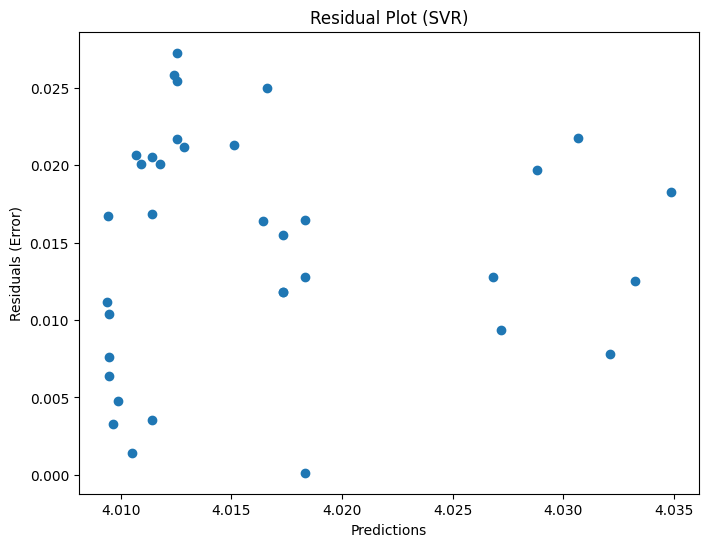

In [71]:
#@title
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=y_test, y=result_df['svr_predicted'], scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (SVR)")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
# plot the residual plot
plt.scatter(result_df['svr_predicted'], result_df['svr_error'])
plt.xlabel("Predictions")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot (SVR)")
plt.show()

In [72]:
#@title
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_svr = model_svr.predict(X_test)
mae = mean_absolute_error(result_df['true'], result_df['svr_predicted'])
mse = mean_squared_error(result_df['true'], result_df['svr_predicted'])
r2 = r2_score(result_df['true'], result_df['svr_predicted'])

# print the scores
print("SVR Correlation : ", stats.pearsonr(y_test,y_svr)[0])
print("SVR MAE:", mae)
print("SVR MSE:", "{:.6f}".format(mse))
print("SVR R2 score:", r2)

from sklearn.model_selection import TimeSeriesSplit

n_splits = 5

# Define the TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=n_splits)

# Create empty lists to store the results
mae_list = []
mse_list = []
r2_list = []

# Loop through each split and fit the model
for train_index, test_index in tscv.split(X):

    # Split the data into train and test sets based on the current fold
    X_train, X_test = X.iloc[:train_index[-1]+1, :], X.iloc[train_index[-1]+1:test_index[-1]+1, :]
    y_train, y_test = y.iloc[:train_index[-1]+1], y.iloc[train_index[-1]+1:test_index[-1]+1]

    # Fit the model on the training data
    model_svr.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model_svr.predict(X_test)

    # Calculate the evaluation metrics for the current fold
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the results to the lists
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

# Calculate the average evaluation metrics across all folds
mae_avg = sum(mae_list)/n_splits
mse_avg = sum(mse_list)/n_splits
r2_avg = sum(r2_list)/n_splits

# Print the results
print("\nForward Chaining SVR MAE: {:.4f}".format(mae_avg))
print("Forward Chaining SVR MSE: {:.4f}".format(mse_avg))
print("Forward Chaining SVR R2 score: {:.4f}".format(r2_avg))

SVR Correlation :  0.7081310339267782
SVR MAE: 0.014810808110023213
SVR MSE: 0.000273
SVR R2 score: 0.38198278417767073

Forward Chaining SVR MAE: 0.0576
Forward Chaining SVR MSE: 0.0082
Forward Chaining SVR R2 score: -4.5677


In [73]:
#@title
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-6M.xlsx")

In [74]:
#@title
cdf_6M_G = df[['PPI', 'PPI_Lagged','GPR']]
cdf_6M_G

,PPI,PPI_Lagged,GPR
0,4.658711,4.656813,4.376408
1,4.657763,4.656813,4.424727
2,4.651099,4.657763,4.764241
3,4.646312,4.657763,4.537684
4,4.640537,4.658711,4.557627
...,...,...,...
339,4.039924,4.038233,5.785128
340,4.048527,4.034028,5.271923
341,4.052446,4.036433,4.974446
342,4.053141,4.041576,4.904500


In [75]:
#@title
X = cdf_6M_G.drop('PPI', axis=1) # Features
y = cdf_6M_G['PPI'] # Target variable

split_idx = int(len(cdf_6M_G)*0.65) # index to split at last entry
X_train = cdf_6M_G.iloc[:split_idx, 1:] # train features
y_train = cdf_6M_G.iloc[:split_idx, 0] # train target
X_test = cdf_6M_G.iloc[split_idx:, 1:] # test features
y_test = cdf_6M_G.iloc[split_idx:, 0] # test target

# Defining Parameters

C_arr = [0.1,1.0,10,100,1000]
eps_arr = [0.1,0.01,0.001,0.0001,0.00001]

# Hyper tuning SVR Model

hyper_arr = []
hyper_cols =  ['c','epsilon','correlation']
for C in C_arr:
    for epsilon in eps_arr:
        model = SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        corr = stats.pearsonr(y_test,y_pred)[0]
        hyper_arr.append([C,epsilon,corr])

hyper_df = pd.DataFrame(hyper_arr,columns= hyper_cols)
hyper_df = hyper_df.sort_values(by=['correlation'], ascending=False)
hyper_df


,c,epsilon,correlation
13,10.0,0.00010,0.846136
12,10.0,0.00100,0.845576
14,10.0,0.00001,0.845152
11,10.0,0.01000,0.719086
16,100.0,0.01000,0.652096
17,100.0,0.00100,0.638112
18,100.0,0.00010,0.628478
19,100.0,0.00001,0.599554
7,1.0,0.00100,0.557003
8,1.0,0.00010,0.543291


In [76]:
#@title
# Building SVR model with best parameters
model_svr = SVR(kernel='rbf', C=10, epsilon=0.0001) # set kernel and hyperparameters
svr = model_svr.fit(X_train, y_train)
result_df = pd.DataFrame([],columns=[])
result_df['svr_predicted'] = model_svr.predict(X_test) # SVR
result_df['true'] = y_test.values
result_df['svr_error'] = abs(result_df['true'] - result_df['svr_predicted'])
result_df

,svr_predicted,true,svr_error
0,4.078068,4.075841,0.002227
1,4.066669,4.075841,0.009172
2,4.062351,4.072440,0.010088
3,4.072595,4.079231,0.006636
4,4.069404,4.084294,0.014890
...,...,...,...
116,3.947977,4.039924,0.091946
117,4.025673,4.048527,0.022855
118,4.024348,4.052446,0.028098
119,4.025884,4.053141,0.027256


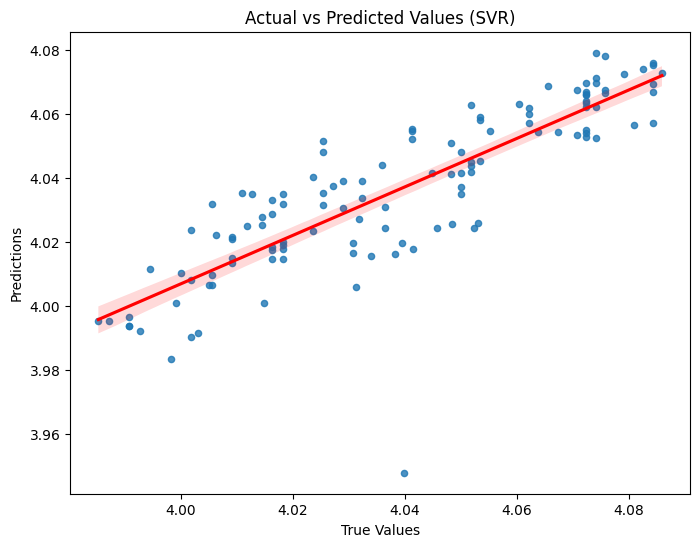

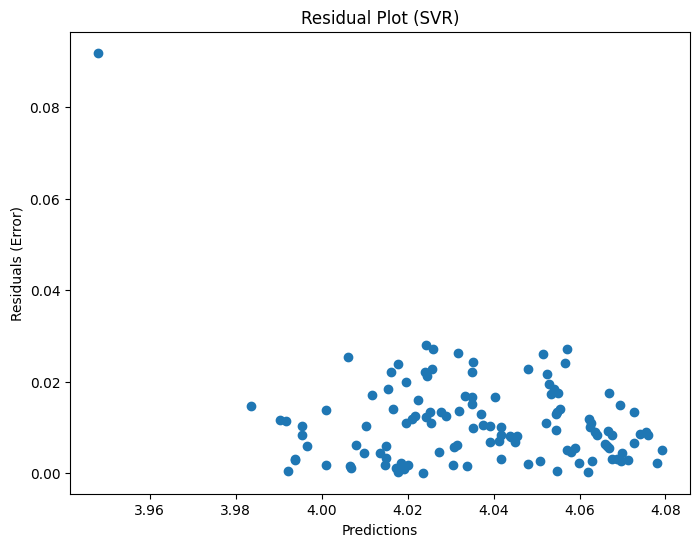

In [77]:
#@title
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=y_test, y=result_df['svr_predicted'], scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (SVR)")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
# plot the residual plot
plt.scatter(result_df['svr_predicted'], result_df['svr_error'])
plt.xlabel("Predictions")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot (SVR)")
plt.show()

In [78]:
#@title
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_svr = model_svr.predict(X_test)
mae = mean_absolute_error(result_df['true'], result_df['svr_predicted'])
mse = mean_squared_error(result_df['true'], result_df['svr_predicted'])
r2 = r2_score(result_df['true'], result_df['svr_predicted'])

#print the parameters
print("C:", model_svr.C)
print("Epsilon:", model_svr.epsilon)

# print the scores
print("SVR Correlation : ", stats.pearsonr(y_test,y_svr)[0])
print("SVR MAE:", mae)
print("SVR MSE:", "{:.6f}".format(mse))
print("SVR R2 score:", r2)

from sklearn.model_selection import TimeSeriesSplit

n_splits = 5

# Define the TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=n_splits)

# Create empty lists to store the results
mae_list = []
mse_list = []
r2_list = []

# Loop through each split and fit the model
for train_index, test_index in tscv.split(X):

    # Split the data into train and test sets based on the current fold
    X_train, X_test = X.iloc[:train_index[-1]+1, :], X.iloc[train_index[-1]+1:test_index[-1]+1, :]
    y_train, y_test = y.iloc[:train_index[-1]+1], y.iloc[train_index[-1]+1:test_index[-1]+1]

    # Fit the model on the training data
    model_svr.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model_svr.predict(X_test)

    # Calculate the evaluation metrics for the current fold
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the results to the lists
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

# Calculate the average evaluation metrics across all folds
mae_avg = sum(mae_list)/n_splits
mse_avg = sum(mse_list)/n_splits
r2_avg = sum(r2_list)/n_splits

# Print the results
print("\nForward Chaining SVR MAE: {:.4f}".format(mae_avg))
print("Forward Chaining SVR MSE: {:.4f}".format(mse_avg))
print("Forward Chaining SVR R2 score: {:.4f}".format(r2_avg))

C: 10
Epsilon: 0.0001
SVR Correlation :  0.8461360559035936
SVR MAE: 0.01112503363519312
SVR MSE: 0.000232
SVR R2 score: 0.7051539701238148

Forward Chaining SVR MAE: 0.0354
Forward Chaining SVR MSE: 0.0030
Forward Chaining SVR R2 score: -0.8770


In [79]:
#@title
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-6M.xlsx")

In [80]:
#@title
cdf_6M_GE = df[['PPI', 'PPI_Lagged','GPR','Export_Semis']]
cdf_6M_GE

,PPI,PPI_Lagged,GPR,Export_Semis
0,4.658711,4.656813,4.376408,4.952300
1,4.657763,4.656813,4.424727,4.950177
2,4.651099,4.657763,4.764241,4.957938
3,4.646312,4.657763,4.537684,4.955827
4,4.640537,4.658711,4.557627,4.938065
...,...,...,...,...
339,4.039924,4.038233,5.785128,4.119037
340,4.048527,4.034028,5.271923,4.123903
341,4.052446,4.036433,4.974446,4.120662
342,4.053141,4.041576,4.904500,4.117410


In [81]:
#@title
X = cdf_6M_GE.drop('PPI', axis=1) # Features
y = cdf_6M_GE['PPI'] # Target variable

split_idx = int(len(cdf_6M_GE)*0.66) # index to split at last entry
X_train = cdf_6M_GE.iloc[:split_idx, 1:] # train features
y_train = cdf_6M_GE.iloc[:split_idx, 0] # train target
X_test = cdf_6M_GE.iloc[split_idx:, 1:] # test features
y_test = cdf_6M_GE.iloc[split_idx:, 0] # test target

# Defining Parameters

C_arr = [0.1,1.0,10,100,1000]
eps_arr = [0.1,0.01,0.001,0.0001,0.00001]

# Hyper tuning SVR Model

hyper_arr = []
hyper_cols =  ['c','epsilon','correlation']
for C in C_arr:
    for epsilon in eps_arr:
        model = SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        corr = stats.pearsonr(y_test,y_pred)[0]
        hyper_arr.append([C,epsilon,corr])

hyper_df = pd.DataFrame(hyper_arr,columns= hyper_cols)
hyper_df = hyper_df.sort_values(by=['correlation'], ascending=False)
hyper_df

,c,epsilon,correlation
12,10.0,0.00100,0.847384
13,10.0,0.00010,0.842495
14,10.0,0.00001,0.836966
11,10.0,0.01000,0.711961
16,100.0,0.01000,0.706698
7,1.0,0.00100,0.589667
8,1.0,0.00010,0.575858
9,1.0,0.00001,0.574847
17,100.0,0.00100,0.464412
6,1.0,0.01000,0.458014


In [82]:
#@title
# Building SVR model with best parameters
model_svr = SVR(kernel='rbf', C=10, epsilon=0.001) # set kernel and hyperparameters
svr = model_svr.fit(X_train, y_train)
result_df = pd.DataFrame([],columns=[])
result_df['svr_predicted'] = model_svr.predict(X_test) # SVR
result_df['true'] = y_test.values
result_df['svr_error'] = abs(result_df['true'] - result_df['svr_predicted'])
result_df

,svr_predicted,true,svr_error
0,4.070025,4.084294,0.014269
1,4.063356,4.084294,0.020938
2,4.074205,4.085976,0.011772
3,4.071183,4.084294,0.013112
4,4.066084,4.080922,0.014837
...,...,...,...
112,4.129498,4.039924,0.089574
113,4.073676,4.048527,0.025148
114,4.030659,4.052446,0.021786
115,4.031287,4.053141,0.021854


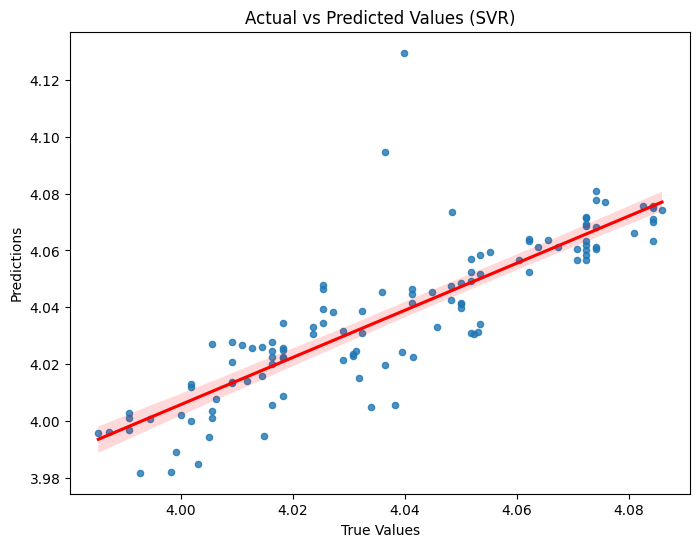

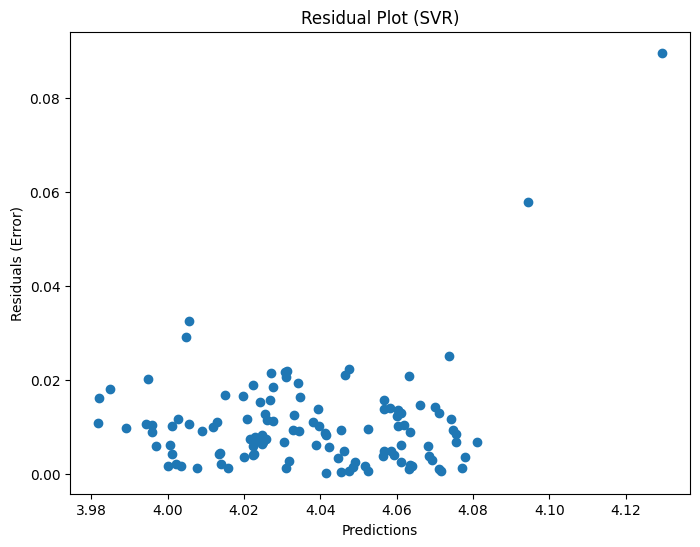

In [83]:
#@title
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=y_test, y=result_df['svr_predicted'], scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (SVR)")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
# plot the residual plot
plt.scatter(result_df['svr_predicted'], result_df['svr_error'])
plt.xlabel("Predictions")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot (SVR)")
plt.show()

In [84]:
#@title
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_svr = model_svr.predict(X_test)
mae = mean_absolute_error(result_df['true'], result_df['svr_predicted'])
mse = mean_squared_error(result_df['true'], result_df['svr_predicted'])
r2 = r2_score(result_df['true'], result_df['svr_predicted'])

#print the parameters
print("C:", model_svr.C)
print("Epsilon:", model_svr.epsilon)

# print the scores
print("SVR Correlation : ", stats.pearsonr(y_test,y_svr)[0])
print("SVR MAE:", mae)
print("SVR MSE:", "{:.6f}".format(mse))
print("SVR R2 score:", r2)

from sklearn.model_selection import TimeSeriesSplit

n_splits = 5

# Define the TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=n_splits)

# Create empty lists to store the results
mae_list = []
mse_list = []
r2_list = []

# Loop through each split and fit the model
for train_index, test_index in tscv.split(X):

    # Split the data into train and test sets based on the current fold
    X_train, X_test = X.iloc[:train_index[-1]+1, :], X.iloc[train_index[-1]+1:test_index[-1]+1, :]
    y_train, y_test = y.iloc[:train_index[-1]+1], y.iloc[train_index[-1]+1:test_index[-1]+1]

    # Fit the model on the training data
    model_svr.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model_svr.predict(X_test)

    # Calculate the evaluation metrics for the current fold
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the results to the lists
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

# Calculate the average evaluation metrics across all folds
mae_avg = sum(mae_list)/n_splits
mse_avg = sum(mse_list)/n_splits
r2_avg = sum(r2_list)/n_splits

# Print the results
print("\nForward Chaining SVR MAE: {:.4f}".format(mae_avg))
print("Forward Chaining SVR MSE: {:.4f}".format(mse_avg))
print("Forward Chaining SVR R2 score: {:.4f}".format(r2_avg))

C: 10
Epsilon: 0.001
SVR Correlation :  0.8473840447951139
SVR MAE: 0.010587847515708883
SVR MSE: 0.000230
SVR R2 score: 0.7005165875120318

Forward Chaining SVR MAE: 0.0303
Forward Chaining SVR MSE: 0.0024
Forward Chaining SVR R2 score: -0.4856


In [85]:
# # preprocess data for the next month
# next_month_data = df.iloc[-1, :].copy()
# next_month_data['Month'] += 1
# next_month_data = scaler.transform([next_month_data.drop('PPI', axis=1)])

# # use SVR model to make the forecast
# forecast = model_svr.predict(next_month_data)[0]

# print("Forecast for next month (SVR):", forecast)

In [86]:
# n_months = 1
# # Create an array of lagged PPI values for the next n_months
# last_PPI = cdf_1M.iloc[-1]['PPI']
# forecast_PPI = [last_PPI]
# for i in range(n_months):
#     lagged_PPI = forecast_PPI[-1]
#     forecast_PPI.append(model_svr.predict(np.array(lagged_PPI).reshape(1, -1))[0][0])

# # Plot the predicted PPI values
# plt.plot(range(len(cdf_1M)), cdf_1M['PPI'], label='Historical PPI')
# plt.plot(range(len(cdf_1M), len(cdf_1M)+n_months), forecast_PPI[1:], label='Forecasted PPI')
# plt.xlabel('Time (months)')
# plt.ylabel('PPI')
# plt.legend()
# plt.show()

# print(*forecast_PPI[1:],sep="\n")